#Exploratory Data Analysis (EDA) of Hotel Booking Dataset

The objective of the analysis is to understand booking patterns, customer behavior, and factors influencing hotel reservations. The insights derived will help hotels optimize operations, improve customer satisfaction, and increase revenue.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


pd.set_option('display.max_columns', None)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import spearmanr, pearsonr, chi2_contingency
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder

In [ ]:
# Load dataset
df = pd.read_csv("bookings_cleaned.csv")
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0          7               2015               July   
1  Resort Hotel            0         13               2015               July   
2  Resort Hotel            0         14               2015               July   
3  Resort Hotel            0         14               2015               July   
4  Resort Hotel            0          0               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     1       1         0       0   
1                        0                     1       1         0       0   
2                        0                     2       2         0       0   
3                        0                     2       2         0       0   
4                        0                     2       2         0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     GBR         Direct               Direct                  0   
1   BB     GBR      Corporate            Corporate                  0   
2   BB     GBR      Online TA                TA/TO                  0   
3   BB     GBR      Online TA                TA/TO                  0   
4   BB     PRT         Direct               Direct                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  A   
1                       0                               0                  A   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  C   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                0   No Deposit      0        0   
1                  A                0   No Deposit    304        0   
2                  A                0   No Deposit    240        0   
3                  A                0   No Deposit    240        0   
4                  C                0   No Deposit      0        0   

   days_in_waiting_list customer_type  adr  required_car_parking_spaces  \
0                     0     Transient   75                            0   
1                     0     Transient   75                            0   
2                     0     Transient   98                            0   
3                     0     Transient   98                            0   
4                     0     Transient  107                            0   

   total_of_special_requests reservation_status reservation_status_date  \
0                          0          Check-Out              2015-07-02   
1                          0          Check-Out              2015-07-02   
2                          1          Check-Out              2015-07-03   
3                          1          Check-Out              2015-07-03   
4                          0          Check-Out              2015-07-03   

  arrival_date  
0   2015-07-01  
1   2015-07-01  
2   2015-07-01  
3   2015-07-01  
4   2015-07-01

In [ ]:
#check for missing values
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_status_date           0
arrival_date                      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116214 entries, 0 to 116213
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   hotel                           116214 non-null  object
 1   is_canceled                     116214 non-null  int64 
 2   lead_time                       116214 non-null  int64 
 3   arrival_date_year               116214 non-null  int64 
 4   arrival_date_month              116214 non-null  object
 5   arrival_date_week_number        116214 non-null  int64 
 6   arrival_date_day_of_month       116214 non-null  int64 
 7   stays_in_weekend_nights         116214 non-null  int64 
 8   stays_in_week_nights            116214 non-null  int64 
 9   adults                          116214 non-null  int64 
 10  children                        116214 non-null  int64 
 11  babies                          116214 non-null  int64 
 12  meal                          

In [ ]:
#check for duplicate values
df.duplicated().sum()

30413

In [ ]:
df.shape

(116214, 33)

In [ ]:
#remove duplicate values
df.drop_duplicates(inplace=True)

#check the shape of the dataset
df.shape

(85801, 33)

In [ ]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['arrival_date'] = pd.to_datetime(df['arrival_date'])

In [ ]:
df.describe().T

count                           mean  \
is_canceled                     85801.0                       0.276582   
lead_time                       85801.0                      80.187947   
arrival_date_year               85801.0                    2016.211816   
arrival_date_week_number        85801.0                      26.838195   
arrival_date_day_of_month       85801.0                      15.806622   
stays_in_weekend_nights         85801.0                       1.011329   
stays_in_week_nights            85801.0                       2.644118   
adults                          85801.0                       1.886178   
children                        85801.0                        0.13508   
babies                          85801.0                       0.010886   
is_repeated_guest               85801.0                       0.040419   
previous_cancellations          85801.0                       0.029662   
previous_bookings_not_canceled  85801.0                       0.185196   
booking_changes                 85801.0                       0.267188   
agent                           85801.0                      81.696262   
company                         85801.0                      11.013578   
days_in_waiting_list            85801.0                       0.740527   
adr                             85801.0                     107.408771   
required_car_parking_spaces     85801.0                       0.084778   
total_of_special_requests       85801.0                       0.700528   
reservation_status_date           85801  2016-08-31 15:49:26.944441088   
arrival_date                      85801  2016-09-15 13:54:55.304250368   

                                                min                  25%  \
is_canceled                                     0.0                  0.0   
lead_time                                       0.0                 12.0   
arrival_date_year                            2015.0               2016.0   
arrival_date_week_number                        1.0                 16.0   
arrival_date_day_of_month                       1.0                  8.0   
stays_in_weekend_nights                         0.0                  0.0   
stays_in_week_nights                            0.0                  1.0   
adults                                          1.0                  2.0   
children                                        0.0                  0.0   
babies                                          0.0                  0.0   
is_repeated_guest                               0.0                  0.0   
previous_cancellations                          0.0                  0.0   
previous_bookings_not_canceled                  0.0                  0.0   
booking_changes                                 0.0                  0.0   
agent                                           0.0                  9.0   
company                                         0.0                  0.0   
days_in_waiting_list                            0.0                  0.0   
adr                                             0.0                 73.0   
required_car_parking_spaces                     0.0                  0.0   
total_of_special_requests                       0.0                  0.0   
reservation_status_date         2014-10-17 00:00:00  2016-03-18 00:00:00   
arrival_date                    2015-07-01 00:00:00  2016-04-02 00:00:00   

                                                50%                  75%  \
is_canceled                                     0.0                  1.0   
lead_time                                      50.0                125.0   
arrival_date_year                            2016.0               2017.0   
arrival_date_week_number                       27.0                 37.0   
arrival_date_day_of_month                      16.0                 23.0   
stays_in_weekend_nights                         1.0                  2.0   
stays_in_week_nights                            2.

# EDA

## General Analysis

In [ ]:
# numerical and categorical datas
num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(exclude='number').columns
date_cols = df.select_dtypes(include=['datetime', 'datetime64']).columns

# Exclude date columns from category columns
cat_cols = cat_cols.difference(date_cols)


In [ ]:
# Define the correct order of reserved_room_type and assigned_room_type
room_type = ['A', 'B', 'C', 'D', 'E', 'F','G', 'H', 'I', 'J', 'K', 'L']

# categorizing the data
df['reserved_room_type'] = pd.Categorical(df['reserved_room_type'], categories=room_type, ordered=True)
df['assigned_room_type'] = pd.Categorical(df['assigned_room_type'], categories=room_type, ordered=True)

In [ ]:
# Define the correct order of rooms
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# categorizing the data
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)

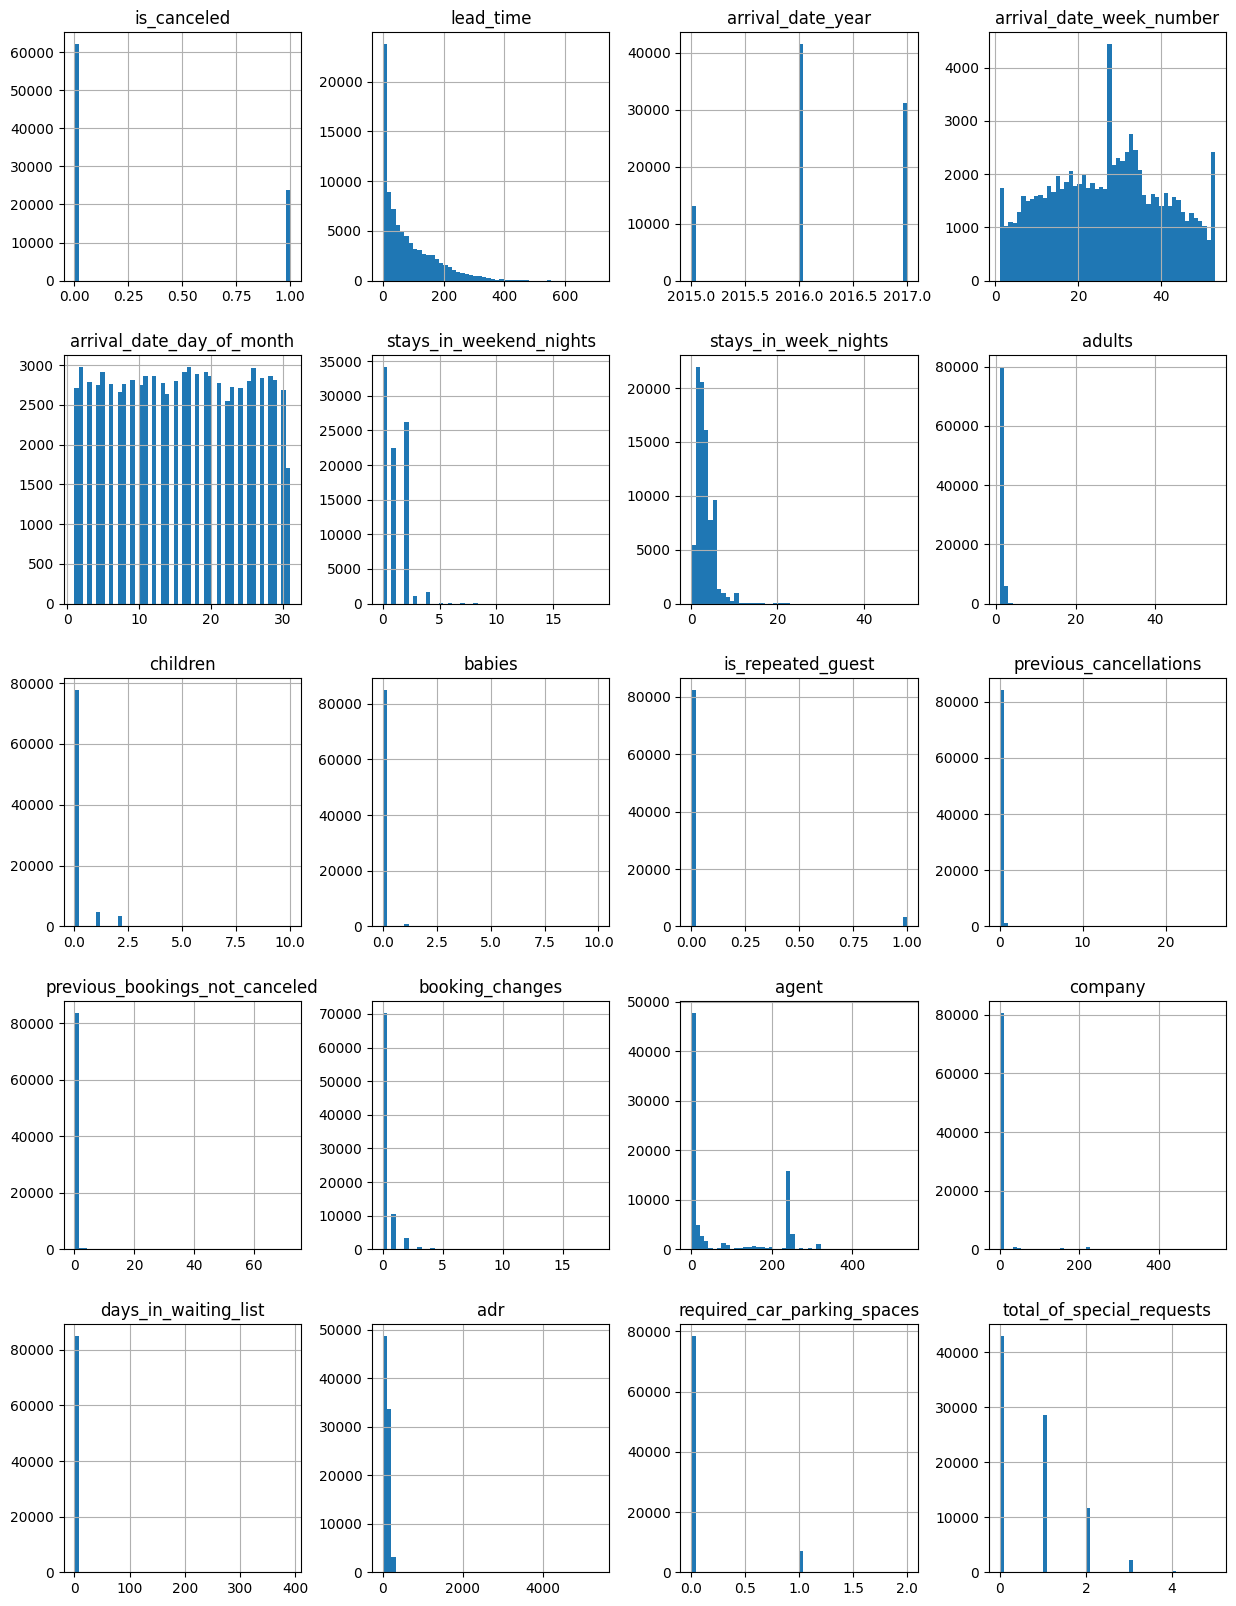

In [ ]:
# Visualization of numerical variables
df[num_cols].hist(bins=50, figsize=(15,20))
plt.show()

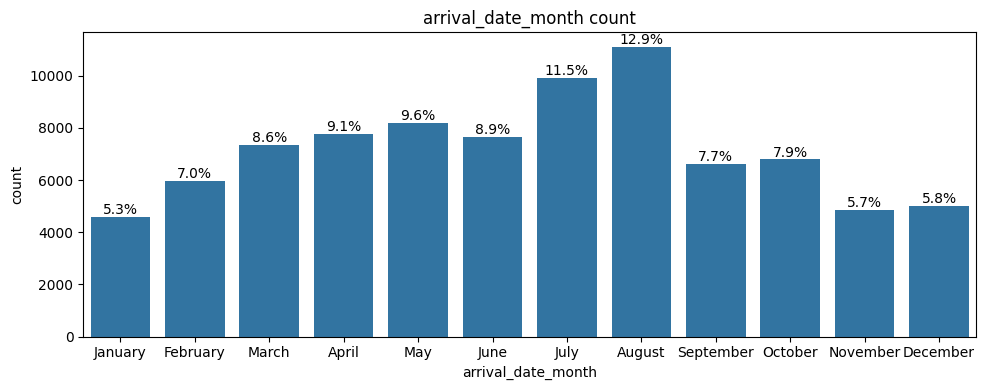

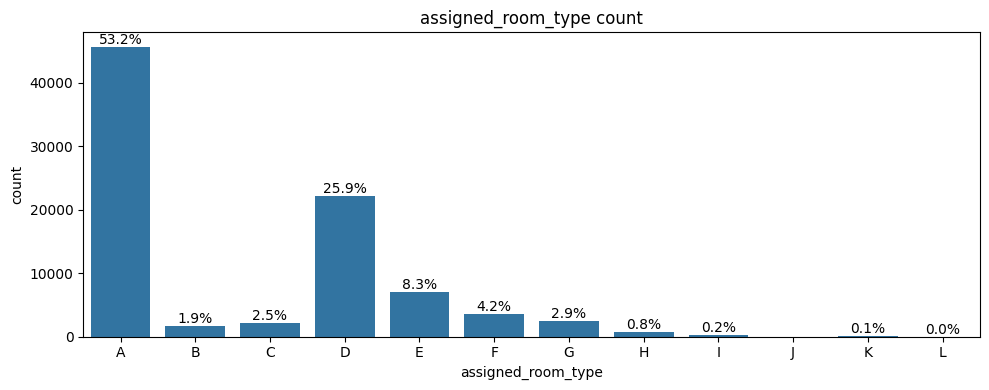

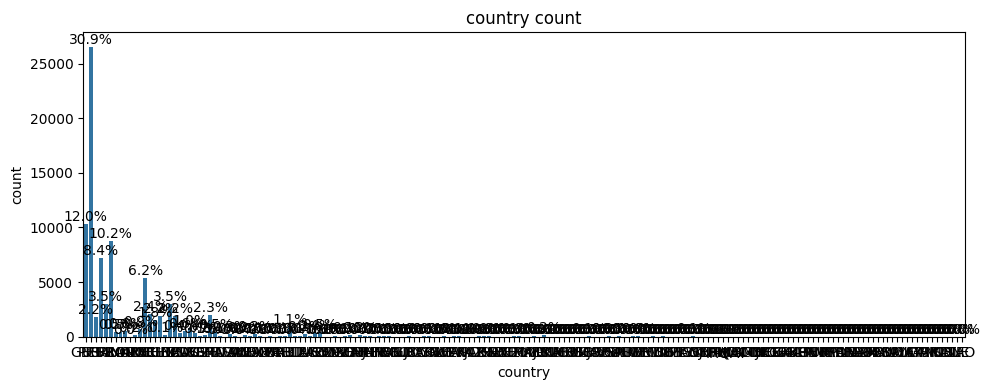

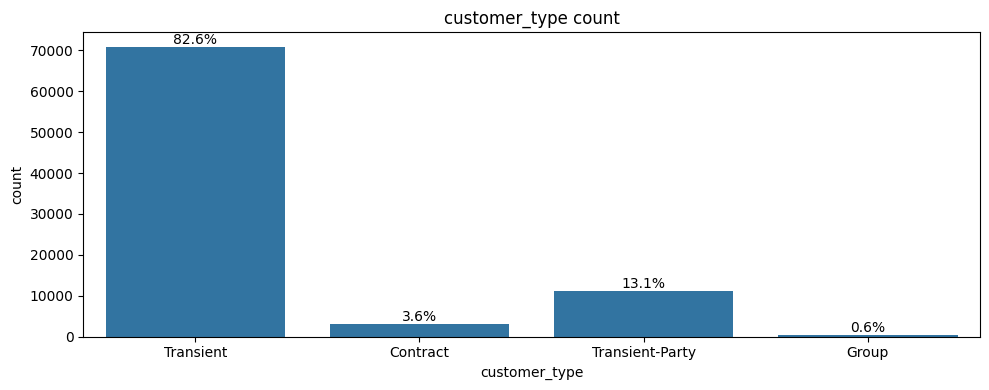

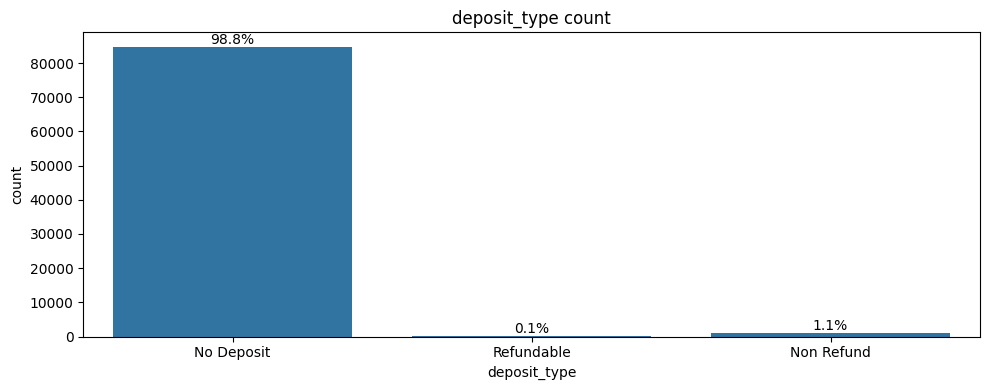

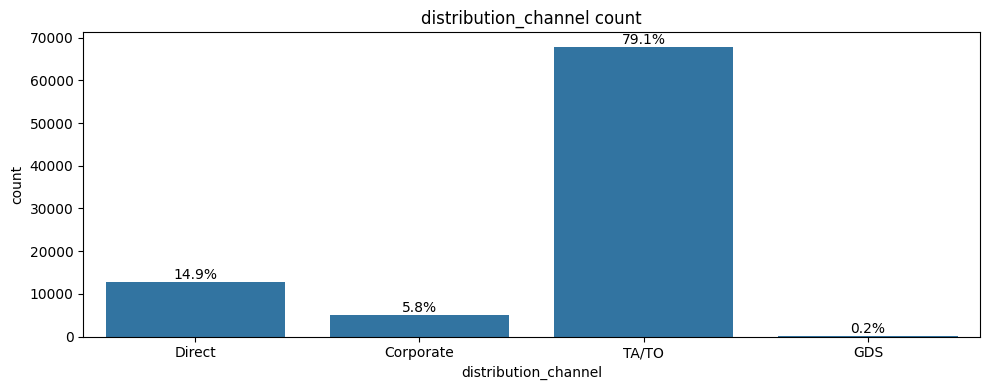

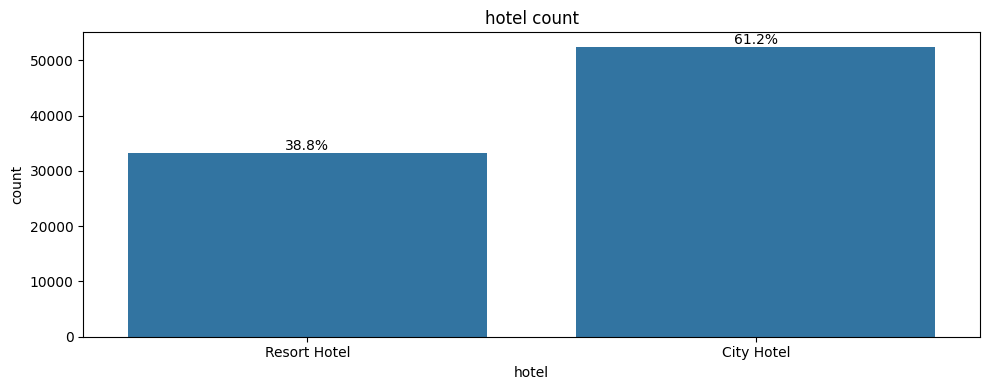

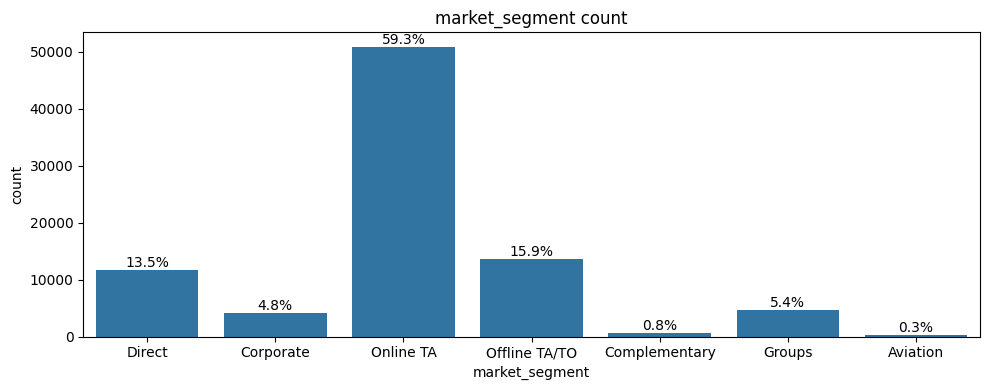

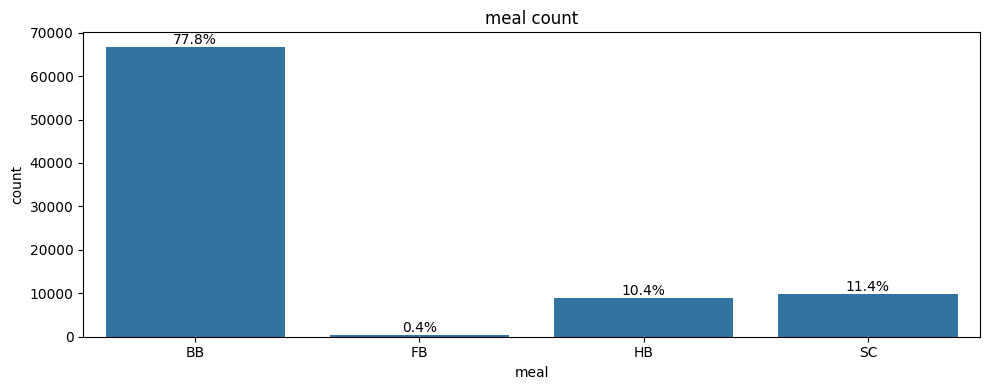

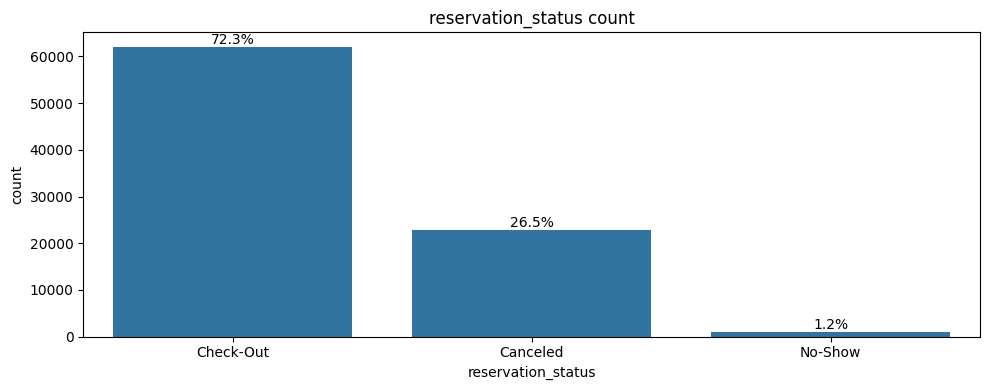

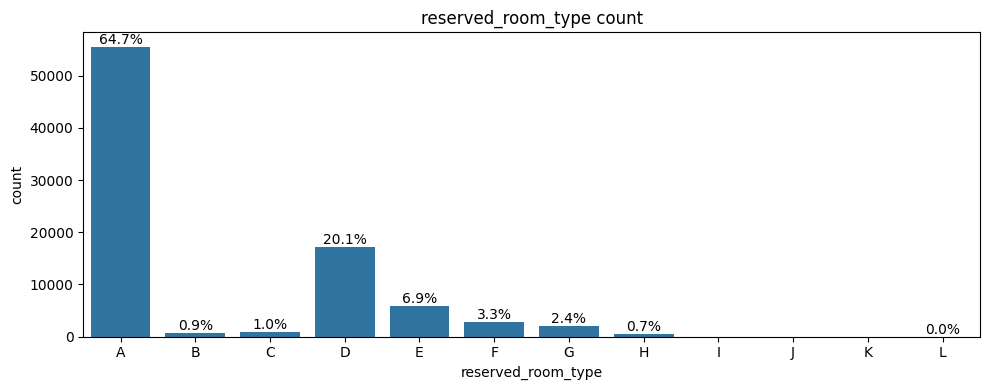

In [ ]:
for col in cat_cols:
    plt.figure(figsize=(10, 4))  # Set figure size
    ax = sns.countplot(data=df, x=col)  # Create a bar plot for the categorical column

    plt.title(f'{col} count')  # Add title using the column name
    plt.xlabel(col)  # Label the x-axis
    plt.ylabel('count')  # Label the y-axis

     # Calculate and add percentages
    total = len(df)
    for p in ax.patches:
        percentage = (p.get_height() / total) * 100
        ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')


    plt.tight_layout()
    plt.show()  # Show the plot

1. **Booking Months:**  
  - Hotel bookings generally rise from **January to August**, peaking in **July and August**, before declining again.
   - **August (12.9%) and July (11.5%)** have the highest number of booked arrivals, suggesting that summer months experience the highest hotel bookings. This could be due to vacation periods or seasonal travel trends.  

   - **January (5.3%) and November (5.7%)** have the lowest number of arrivals, possibly indicating reduced travel demand during these months, potentially due to post-holiday slowdowns and winter conditions in some regions.  


2. **Customer Type:**  
  - Transient is the highest customer type at 82.6 % and the lowest are those that booked in groups


3. **Room Type:**  
  - **Most Popular Room Type** : Room Type A is the most commonly reserved (64.7%) but has a significantly lower assignment rate (53.2%).
  - Only 20.1% of reservations were for Room Type D, but 25.9% of assignments were Room Type D.
  - Room Types E, C, and B all saw an increase in assignments compared to reservations, implying upgrades or reassignments.
  - Room Type F, G, and H have slight variations, but the overall percentage shift is not as drastic as Room Types A and D.

4. **Deposit Type Insights**
  - **"No Deposit" is overwhelmingly dominant (98.8%)**, indicating that most bookings do not require upfront payments.
  - **Refundable deposits are rare (0.1%)**, suggesting that hotels do not commonly offer fully refundable options.
  - **Implication:**  
    - Since most bookings do not require a deposit, cancellations (26.5%) and no-shows (1.2%) may be higher due to lower commitment.
    
5.  ** Distribution Channel Insights**
  - **TA/TO (Travel Agent/Tour Operator) is the primary channel (79.1%)**, meaning most bookings come through intermediaries.
  - **Direct bookings (14.9%) are significantly lower**, showing that fewer customers book directly through hotel websites or calls.
  - **Corporate bookings (5.8%) and GDS (Global Distribution System) bookings (0.2%) are minor contributors.**
  - **Implication:**  
    - Heavy reliance on **third-party agents (TA/TO)** could mean **higher commission costs for hotels**.
    - Encouraging more **direct bookings (e.g., through promotions or loyalty programs)** could improve profitability.

6. **Market Segment Insights**
  - **Online Travel Agents (OTA) dominate at 59.3%**, showing that a majority of guests book through platforms like Booking.com, Expedia, etc.
  - **Offline TA/TO (15.9%) and Direct (13.5%) bookings are secondary.**
  - **Corporate (4.8%), Groups (5.4%), and Complimentary (0.8%) bookings are minimal.**
  - **Aviation-related bookings (0.3%) are the least common.**
  - **Implication:**  
    - The reliance on **OTA platforms** means hotels may be paying high **commission fees**.
    - **Direct marketing efforts** could help shift more bookings to **direct channels**.
    - The **low share of corporate bookings (4.8%)** suggests room for growth in **business travel partnerships**.

7. **Meal Plan Insights**
  - **Bed & Breakfast (BB) is the most preferred meal plan (77.8%)**, indicating that guests value breakfast included in their stay.
  - **Self-Catering (SC) (11.4%) and Half Board (HB) (10.4%) are less common**.
  - **Full Board (FB) (0.4%) is almost non-existent**, suggesting low demand for all-inclusive meal plans.
  - **Implication:**  
    - **Hotels may benefit from bundling breakfast options** to increase guest satisfaction.

8. **Reservation Status Insights**
  - **72.3% of bookings result in check-out**, indicating a high completion rate.
  - **26.5% of bookings are canceled**, which is relatively high.
  - **1.2% of bookings are no-shows**, meaning guests who booked but did not show up.
  - **Implication:**  
    - **A high cancellation rate (26.5%)** may be linked to the **"No Deposit" policy**.
    - Implementing **stricter cancellation policies** or requiring partial deposits could **reduce cancellations**.
    - Offering **discounts for non-refundable bookings** could help secure revenue in advance.



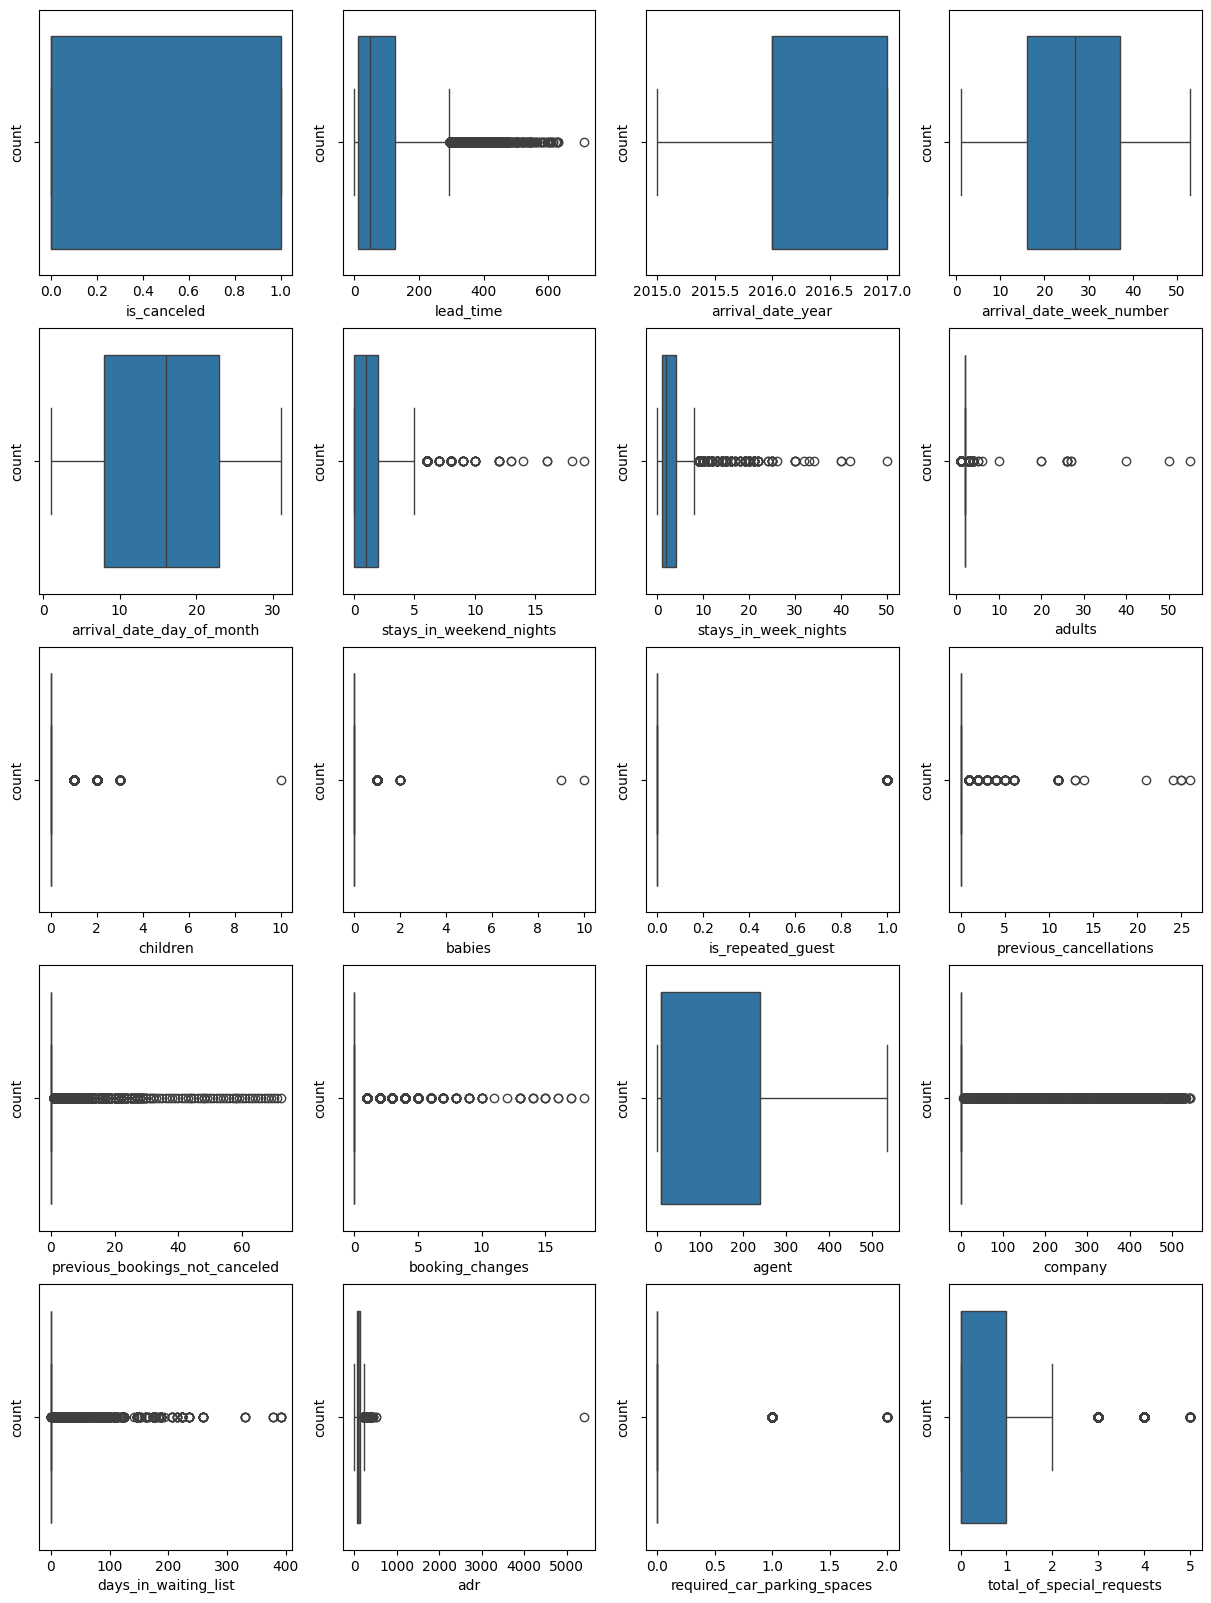

In [ ]:
plt.figure(figsize=(15, 20))  # Set the overall figure size

for i, col in enumerate(num_cols):  # Iterate through numerical columns with index
    plt.subplot(5, 4, i+1)  # Create a grid of subplots with 5 rows and 4 columns
    sns.boxplot(data=df, x=col)  # Draw a box plot for each numerical column

    plt.xlabel(col)  # Label the x-axis with the column name
    plt.ylabel('count')  # Label the y-axis as 'count'

plt.show()  # Display all the subplots

**1. Cancellation Trends (`is_canceled`)**
- The **majority of bookings are completed (not canceled)**, but a **significant portion is canceled**.
- This aligns with the previously noted **26.5% cancellation rate**.
- **Implication:**  
  - Long lead times and flexible deposit policies might be contributing to cancellations.
  - Implementing cancellation penalties or incentives for prepayment may reduce cancellations.

**2. Lead Time (`lead_time`)**
- Lead times vary significantly, with some bookings made **over 600 days in advance**.
- Most bookings have a **lead time of 0-200 days**, but a few extreme cases extend much further.
- **Implication:**  
  - **Longer lead times may be correlated with higher cancellation rates**.
  - Analyzing lead time vs. cancellation behavior could help in **forecasting demand and reducing cancellations**.

**3. Stays in Weekends vs. Weeknights (`stays_in_weekend_nights`, `stays_in_week_nights`)**
- **Most guests stay for short durations** (few nights).
- There are some **outliers with unusually long stays**.
- **Implication:**  
  - Hotels should target marketing based on these patterns (e.g., **weekend getaway promotions**).

**4. Number of Guests (`adults`, `children`, `babies`)**
- **Most bookings are for 1-2 adults**, with very few bookings for large groups.
- **Children and babies are rarely included in bookings**.
- **Implication:**  
  - Hotels may focus more on **business and couple travelers**.
  - Limited bookings with children may indicate a need for better **family-friendly promotions**.

 **5. Repeated Guests (`is_repeated_guest`)**
- The majority are **new guests** rather than repeated guests.
- **Implication:**  
  - There's **potential for loyalty programs** to encourage repeat bookings.

**6. Previous Cancellations and Not-Canceled Bookings (`previous_cancellations`, `previous_bookings_not_canceled`)**
- Some guests have **multiple previous cancellations**, indicating possible misuse of flexible policies.
- **Implication:**  
  - Identifying and managing **frequent cancelers** with stricter policies could reduce cancellation rates.

**7. Booking Changes (`booking_changes`)**
- Most bookings **have little to no modifications**, but some show **multiple changes**.
- **Implication:**  
  - Guests making multiple modifications could be **more likely to cancel**, warranting targeted retention efforts.

**8. ADR (Average Daily Rate)**
- There are extreme outliers, with some values exceeding **5000**, which could be **data entry errors or luxury bookings**.
- **Implication:**  
  - Outliers should be checked for **data inconsistencies**.

**9. Total Special Requests (`total_of_special_requests`)**
- Most guests make **0-1 special requests**, but a few make more.
- **Implication:**  
  - Personalized service can be enhanced by **analyzing frequent request types**.



In [ ]:
# checking the extreme outlier of adr
df[df['adr'] > 5000]

hotel  is_canceled  lead_time  arrival_date_year  \
47453  City Hotel            1         35               2016   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
47453              March                        13                         25   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  \
47453                        0                     1       2         0   

       babies meal country market_segment distribution_channel  \
47453       0   BB     PRT  Offline TA/TO                TA/TO   

       is_repeated_guest  previous_cancellations  \
47453                  0                       0   

       previous_bookings_not_canceled reserved_room_type assigned_room_type  \
47453                               0                  A                  A   

       booking_changes deposit_type  agent  company  days_in_waiting_list  \
47453                1   Non Refund     12        0                     0   

      customer_type   adr  required_car_parking_spaces  \
47453     Transient  5400                            0   

       total_of_special_requests reservation_status reservation_status_date  \
47453                          0           Canceled              2016-02-19   

      arrival_date  
47453   2016-03-25

the booking was made for 2 adults for a night so it dosemnt make sense why the average daily rate will be that high

so the row will be deleted

In [ ]:
df = df[df['adr'] <= 5000]

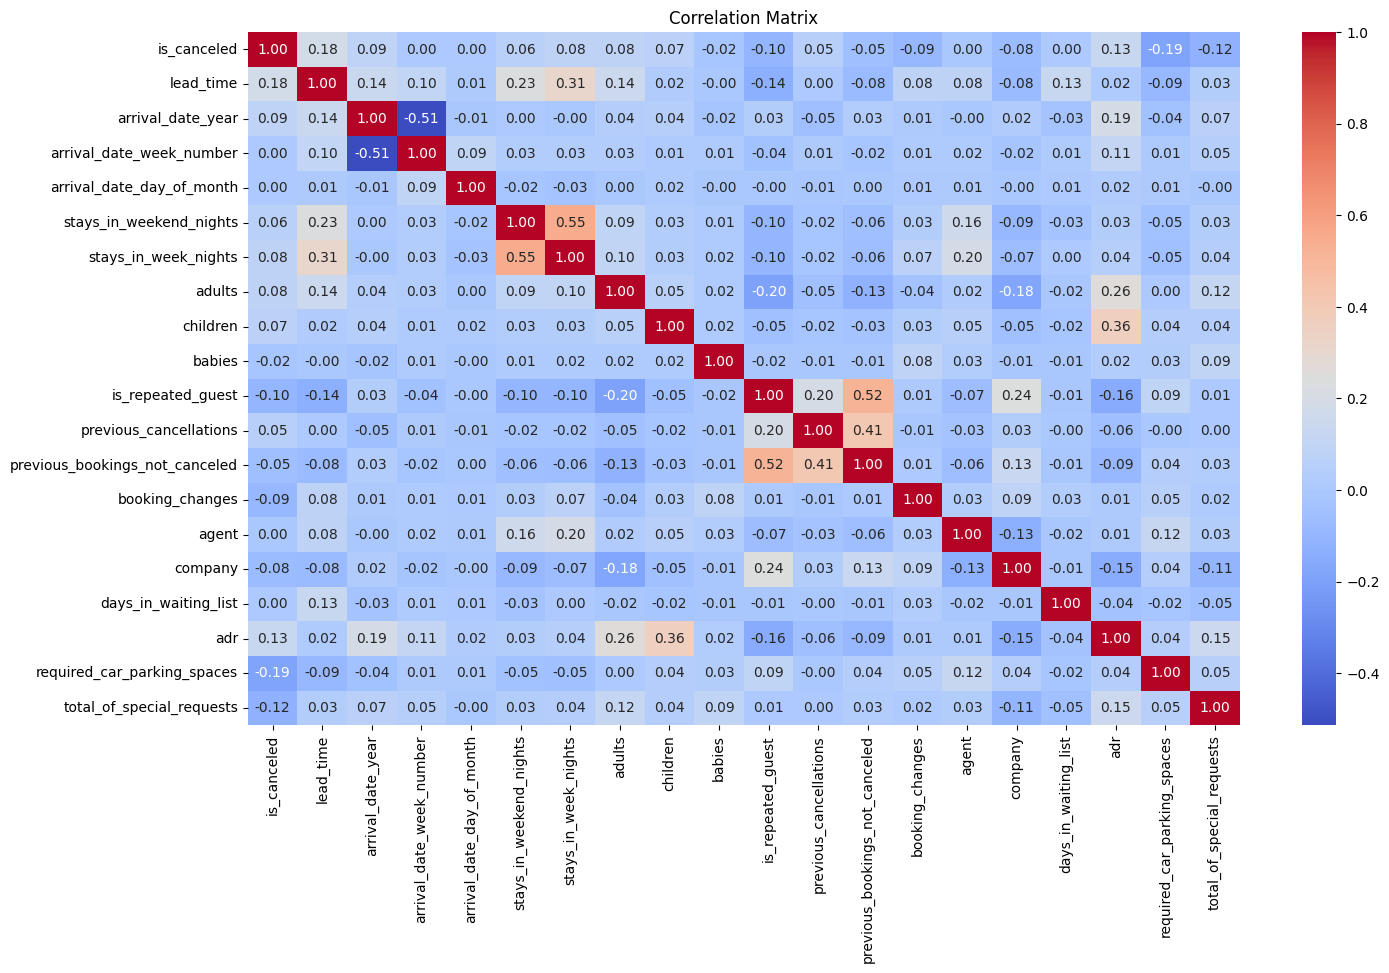

In [ ]:
# Correlation matrix for numerical data
correlation_matrix = df[num_cols].corr()  # Calculate correlation matrix for numerical columns

plt.figure(figsize=(16, 9))  # Set figure size
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')  # Create heatmap with annotations
plt.title('Correlation Matrix')  # Add title
plt.show()  # Display the plot


- **`stays_in_week_nights` ↔ `stays_in_weekend_nights` (0.55)** → Guests who stay during the week might tend to stay on weekends.  
- **`is_repeated_guest` ↔ `previous_bookings_not_canceled` (0.52)** → Repeat guests might have more past successful bookings.  
- **`previous_cancellations` ↔ `previous_bookings_not_canceled` (0.41)** → Guests with past cancellations might have completed bookings.  
- **`previous_bookings_not_canceled` ↔ `is_repeated_guest` (0.52)** → More past bookings mightincrease the likelihood of being a repeat guest.  


## Booking Behaviour

### Top Countries

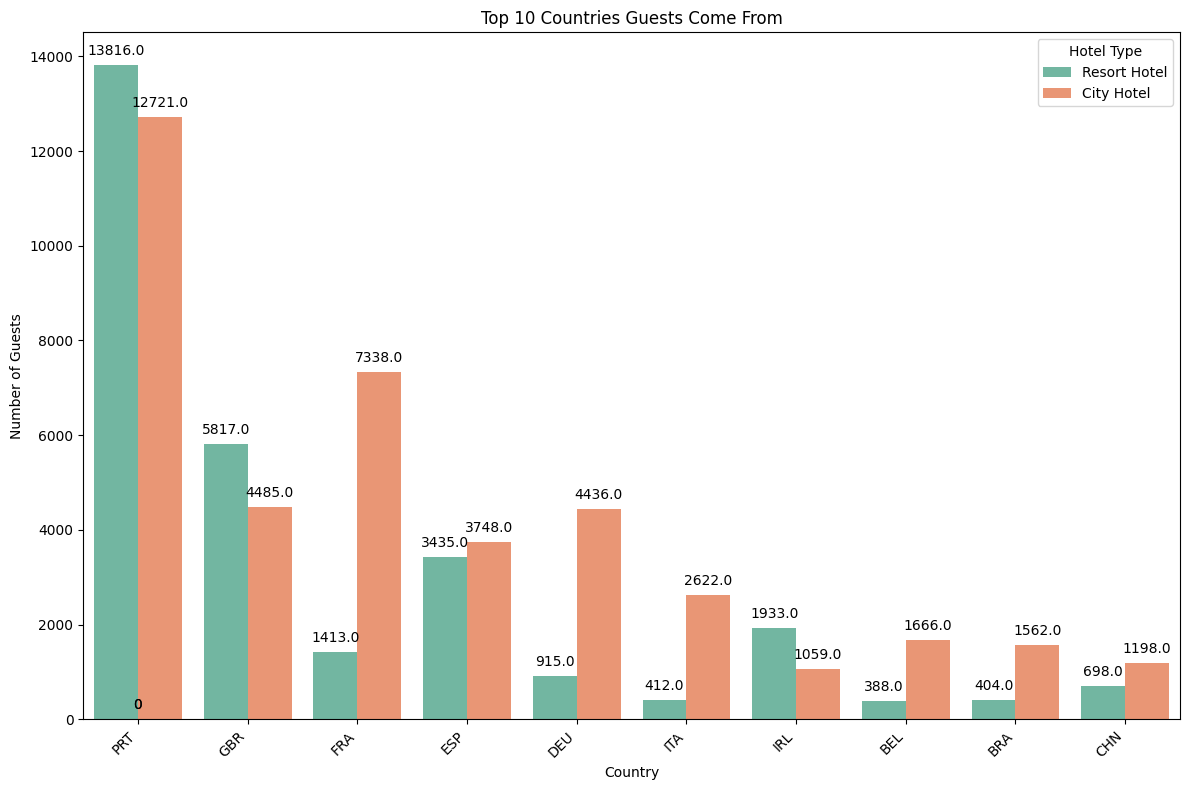

In [ ]:
plt.figure(figsize=(12, 8))  # Increase figure size

top_countries = df['country'].value_counts().head(10).index
filtered_df = df[df['country'].isin(top_countries)]

# Create the count plot (vertical bars)
ax = sns.countplot(data=filtered_df, x='country', hue='hotel', palette="Set2", order=top_countries)

# Add count labels above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Formatting
plt.title('Top 10 Countries Guests Come From')
plt.xlabel('Country')
plt.ylabel('Number of Guests')
plt.legend(title="Hotel Type")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

**Key Insights from the Top 10 Countries Guests Come From**  

1. **Portugal (PRT) Leads Domestic Tourism** – Highest number of guests in both **Resort (13,816)** and **City Hotels (12,721)**.  

2. **UK (GBR) Prefers Resorts** – More **British guests (5,817)** choose **Resort Hotels** over **City Hotels (4,485)**.  

3. **France (FRA) Prefers City Hotels** – **7,338 guests** in **City Hotels** vs. only **1,413 in Resorts**.  

4. **Spain (ESP) is Balanced** – Similar guest distribution: **3,748 (City) vs. 3,435 (Resort)**.  

5. **Germany (DEU) & Italy (ITA) Favor Cities** – More guests in **City Hotels (4,436 & 2,622)** than Resorts (**915 & 412**).  

6. **Ireland (IRL) is Mixed** – **1,933 in Resorts vs. 1,059 in City Hotels**.  

7. **Belgium (BEL), Brazil (BRA), & China (CHN) Prefer Cities** – Higher guest numbers in **City Hotels** than **Resorts**.

### Bussiest Months

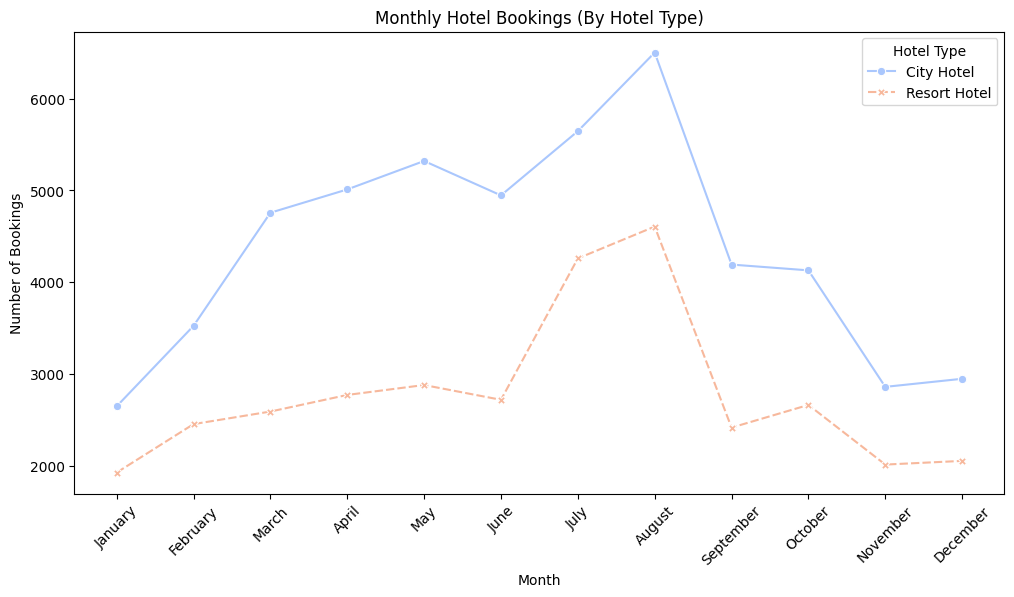

In [ ]:
# Aggregate the data by month and hotel type (if not already aggregated)
bookings_df = df.groupby(['arrival_date_month', 'hotel']).size().reset_index(name='bookings')

plt.figure(figsize=(12, 6))

# Create the line plot with different line styles
sns.lineplot(x='arrival_date_month', y='bookings', hue='hotel', data=bookings_df, palette='coolwarm',
             style='hotel', markers=True)  # Add markers for data points

plt.title('Monthly Hotel Bookings (By Hotel Type)')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.legend(title="Hotel Type")
plt.show()

**Key Insights from Monthly Hotel Bookings (By Hotel Type)**  

1. **Peak Season in Summer (June–August)**  
   - **City Hotels** reach the highest bookings in **August (~6,500)**.  
   - **Resort Hotels** also peak in **August (~4,500)**, suggesting summer is the busiest season.  

2. **Gradual Rise from January to July**  
   - Bookings steadily increase for both hotel types, with **City Hotels** seeing a sharper rise.  

3. Both hotel types experience a significant drop in **September**, especially **Resort Hotels**.  
   - Likely due to the end of the summer vacation period.  

4. Bookings hit their lowest in **November & December**, possibly due to reduced travel.  

5. **City Hotels** maintain higher bookings throughout the year, indicating stronger demand for urban stays.

### Bookings by Market Segment

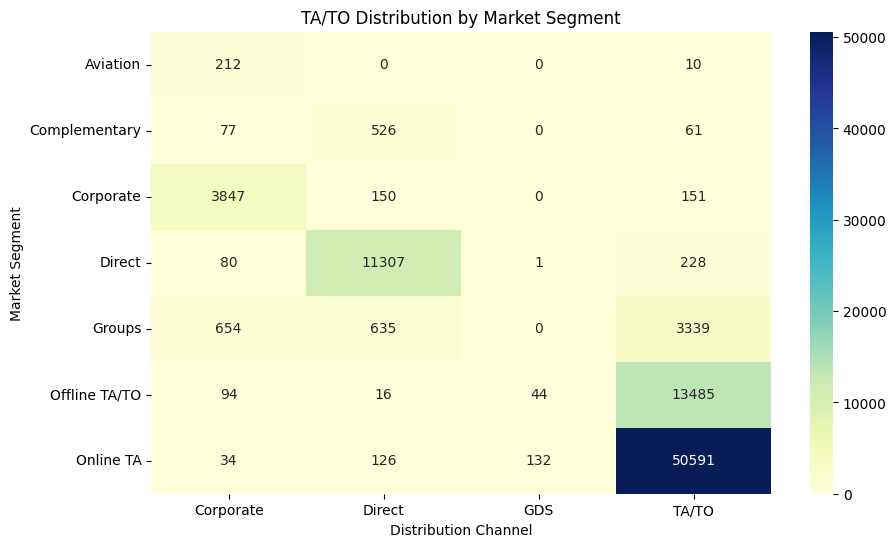

In [ ]:
market_channel = df.groupby(['market_segment', 'distribution_channel']).size().unstack().fillna(0)

plt.figure(figsize=(10, 6))
sns.heatmap(
    market_channel,
    annot=True,
    fmt=".0f",
    cmap="YlGnBu",
    cbar=True
)

plt.title("TA/TO Distribution by Market Segment")
plt.xlabel("Distribution Channel")
plt.ylabel("Market Segment")
plt.show()

**Key Insights from TA/TO Distribution by Market Segment Heatmap**  

1. **Online TA is the Dominant Booking Channel**  
   - The highest booking count (**50,591**) comes from the **Online Travel Agents (Online TA)** segment.  
   - Suggests a strong preference for digital bookings, likely due to ease of access and discounts.  

2. **Direct Bookings Are Also Significant**  
   - The **Direct distribution channel** has a high booking volume, especially in the **Direct market segment (11,307)**.  
   - Indicates that many customers prefer to book directly, possibly for loyalty programs or better rates.  

3. **Corporate and Groups Prefer Direct and Corporate Channels**  
   - The **Corporate market segment** primarily books through the **Corporate distribution channel (3,847)**.  
   - The **Groups segment** has **3,339 bookings via TA/TO**, suggesting reliance on travel agencies for group coordination.  

4. **Offline TA/TO Still Holds Value**  
   - The **Offline TA/TO** segment has a substantial number of bookings (**13,486**), showing that traditional travel agencies remain relevant.  
   - Likely caters to customers preferring personalized service or complex travel plans.  

5. **Minimal Use of GDS (Global Distribution System)**  
   - The **GDS channel has almost no significant bookings**, indicating that this system is not a primary source of reservations.  

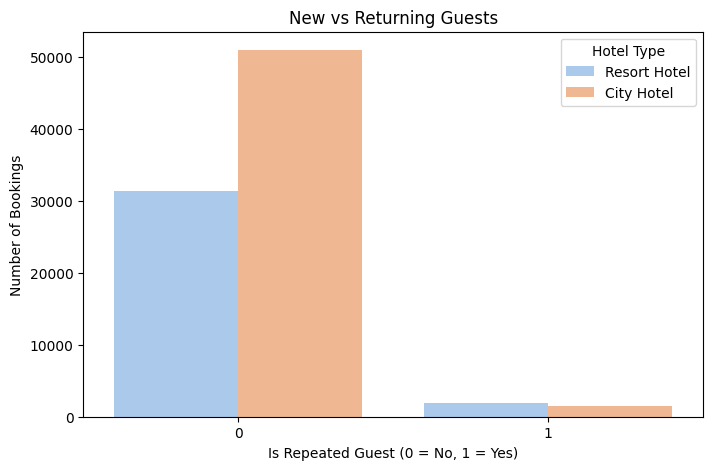

In [ ]:
#return guests
plt.figure(figsize=(8,5))
sns.countplot(x='is_repeated_guest', hue='hotel', data=df, palette='pastel')
plt.title('New vs Returning Guests')
plt.xlabel('Is Repeated Guest (0 = No, 1 = Yes)')
plt.ylabel('Number of Bookings')
plt.legend(title="Hotel Type")
plt.show()


## Stay Duration Analysis

In [ ]:
# Binning the daily rate into ranges (for continuous data)
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 500, float('inf')]  # Example bins – adjust as needed
labels = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300', '300-350', '350-400', '400-500', '500+']
df['adr_bins'] = pd.cut(df['adr'], bins=bins, labels=labels, right=False)


In [ ]:
# Add Stay Duration .i.e. actual no of days stayes in the hotel
df.loc[:, 'Stay_Duration'] = df.apply(
    lambda row: 0 if row['reservation_status'] in ["Canceled", "No-Show"]
    else (pd.to_datetime(row['reservation_status_date']) - pd.to_datetime(row['arrival_date'])).days, axis=1)

In [ ]:
# Create total_rate column based on conditions
df['total_booked_days'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights'] # no of days booked
df['total_rate'] = df['adr'] * df['Stay_Duration']

# Adjust total_rate for non-refundable cancellations
df.loc[(df['Stay_Duration'] == 0) & (df['deposit_type'] == 'Non Refund'), 'total_rate'] = df['adr'] * df['total_booked_days']


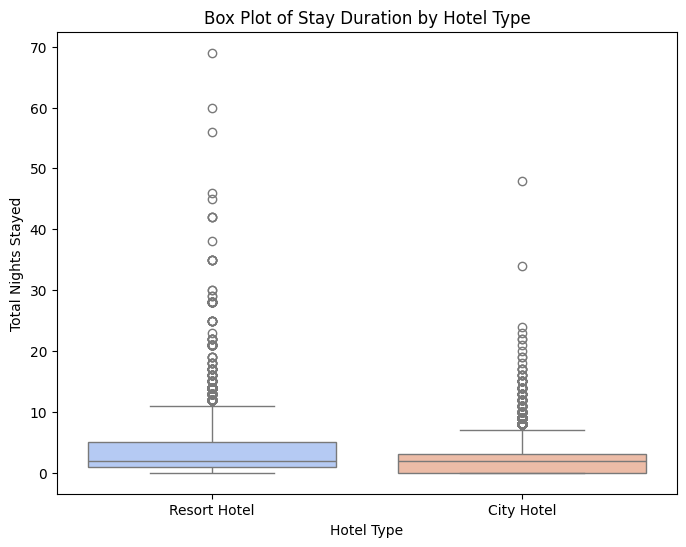

In [ ]:
# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='hotel', y='Stay_Duration', data=df, palette="coolwarm")
plt.title('Box Plot of Stay Duration by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Total Nights Stayed')
plt.show()

**Key Insights from Box Plot of Stay Duration by Hotel Type**  

1. **Resort Hotels Have Longer Stay Durations**  
   - The interquartile range (IQR) for Resort Hotelsis wider, indicating more variation in stay durations.  

2. **City Hotels Have Shorter Stays**  
   - Most stays are concentrated within **1 to 3 nights** with fewer long stays.  
   - This suggests guests primarily book City Hotels for business trips or short vacations.  

3. **More Extreme Outliers in Resort Hotels**  
   - Resort Hotels have **many extreme long stays**, with some exceeding **70 nights**.  
   - Likely due to extended vacations or long-term leisure stays.  

4. **City Hotels Also Have Outliers, But Less Extreme**  
   - Some stays in City Hotels extend beyond **30 nights**, though not as frequently as Resort Hotels.  
   - Could indicate corporate stays or long-term travel assignments.  

In [ ]:
from scipy.stats import ttest_ind, pearsonr
### Are weekend stays shorter than weeknight stays? ###
weekend_avg = df["stays_in_weekend_nights"].mean()
weekday_avg = df["stays_in_week_nights"].mean()

print(f"Average Weekend Stay Duration: {weekend_avg:.2f} nights")
print(f"Average Weeknight Stay Duration: {weekday_avg:.2f} nights")


Average Weekend Stay Duration: 1.01 nights
Average Weeknight Stay Duration: 2.64 nights


In [ ]:
# Perform a t-test to check if the difference is significant
t_stat, p_value = ttest_ind(df["stays_in_weekend_nights"], df["stays_in_week_nights"], equal_var=False)
print(f"T-test Result: t-statistic={t_stat:.2f}, p-value={p_value:.4f}")


T-test Result: t-statistic=-209.82, p-value=0.0000


Weekend stays are significantly shorter than weeknight stays.
The p-value of 0.0000 suggests this difference is statistically significant

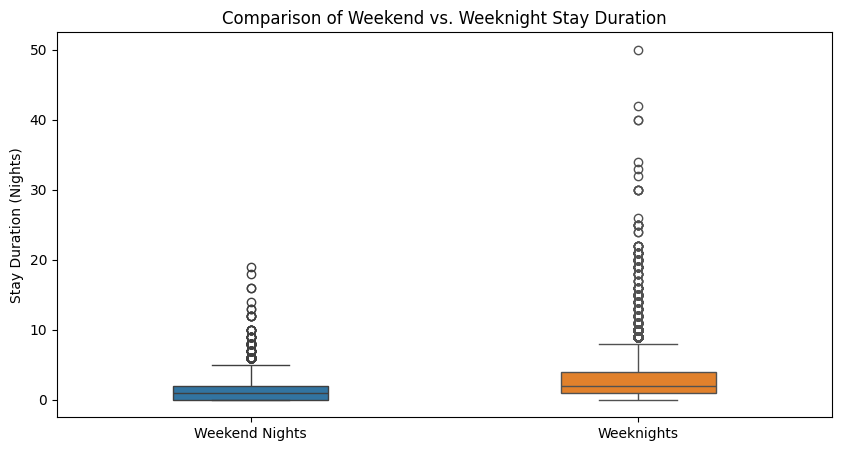

In [ ]:
# Visualize distribution
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x=["Weekend Nights"]*len(df), y=df["stays_in_weekend_nights"], width=0.4)
sns.boxplot(data=df, x=["Weeknights"]*len(df), y=df["stays_in_week_nights"], width=0.4)
plt.ylabel("Stay Duration (Nights)")
plt.title("Comparison of Weekend vs. Weeknight Stay Duration")
plt.show()

 **Comparison of Weekend vs. Weeknight Stay Duration**
   - Most guests tend to stay for short durations (1-2 nights).
   - Weeknight stays have a wider range and more outliers where some stays extend to 50 weeknight, suggesting that business travelers or long-term guests may extend their stays during the week.

In [ ]:
### How does stay duration impact ADR (revenue)? ### total_booked_days
# Correlation between stay duration and ADR
corr, p_value = pearsonr(df["Stay_Duration"], df["adr"])
print(f"Correlation between Stay Duration and ADR: {corr:.2f} (p-value: {p_value:.4f})")


Correlation between Stay Duration and ADR: -0.05 (p-value: 0.0000)


There is a weak negative correlation between stay duration and ADR.

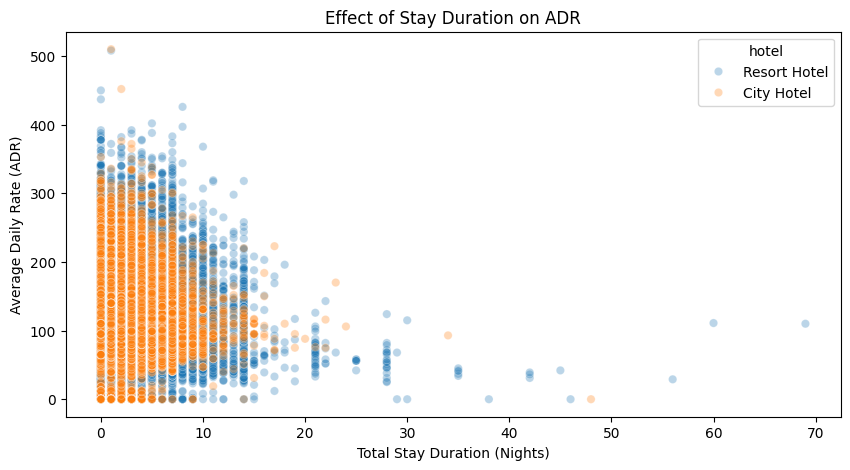

In [ ]:
# Scatter plot of ADR vs Stay Duration
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="Stay_Duration", y="adr", hue = 'hotel', alpha=0.3)
plt.xlabel("Total Stay Duration (Nights)")
plt.ylabel("Average Daily Rate (ADR)")
plt.title("Effect of Stay Duration on ADR")
plt.show()


**Key Observations:**
1. **Inverse Relationship Between Stay Duration and ADR:**
   - The chart shows a clear downward trend, meaning that as the stay duration increases, the ADR generally decreases.
   - This suggests that longer stays tend to receive lower daily rates, possibly due to discounts for extended bookings.

2. **High ADR for Short Stays:**
   - Most of the highest ADR values (above 250) are concentrated within short stays (1-5 nights), indicating that guests who stay for shorter periods can pay eithr very low or high rated(depends on other factors)
   - This could be due to higher demand for short-term stays, last-minute bookings, or peak-season pricing.

3. **Resort Hotels vs. City Hotels:**
   - **City Hotels (Orange Points):** Tend to have short stays compared to Resort Hotels, which might be due to business travelers who are coming for a few days trip
   - **Resort Hotels (Blue Points):** Show a more scattered distribution, especially for longer stays, reinforcing the idea that resorts may offer discounted rates for extended vacations.

4. **Longer Stays Have Lower Variability:**
   - For stays longer than 20 nights, ADR values become more stable and remain below 200 in most cases.
   - This suggests that hotels apply a more consistent pricing strategy for long-term guests.

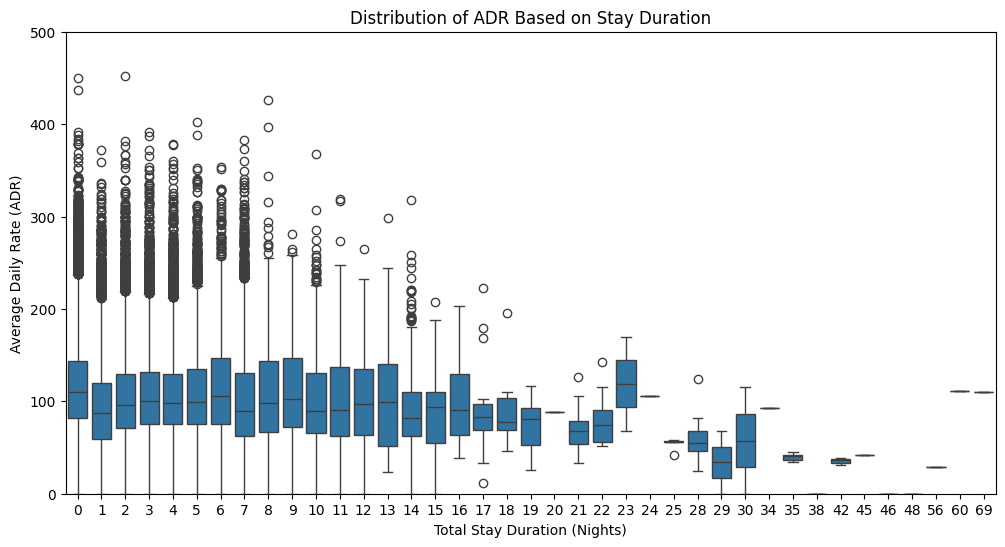

In [ ]:
# Boxplot to check ADR for different stay durations
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Stay_Duration", y="adr")
plt.ylim(0, 500)  # Adjusting for outliers
plt.xlabel("Total Stay Duration (Nights)")
plt.ylabel("Average Daily Rate (ADR)")
plt.title("Distribution of ADR Based on Stay Duration")
plt.show()


**Distribution of ADR Based on Stay Duration**
   - **Observation:** The median ADR fluctuates slightly across different stay durations but shows a general decline as the stay duration increases.
   - **Variation:** For short stays (1-10 nights), ADR shows high variability with several outliers.
   - **Stable ADRs:** For longer stays (e.g., 30+ nights), the ADR values become more stable and lower.

   **Insight:**
   - Short-term guests (1-10 nights) face higher price variation, possibly due to demand fluctuations.
   - Long-term guests (30+ nights) are likely getting consistent, discounted rates.
   - Hotels may benefit from targeting long-term guests with special rates to increase occupancy.

## Cancelation Analaysis

In [ ]:
total_bookings = len(df)
canceled_counts = df.groupby('hotel')['is_canceled'].sum()
overall_cancellation_rate = (canceled_counts.sum() / total_bookings) * 100

bookings_per_hotel = df.groupby('hotel').size()

# Calculate total cancellations per hotel
total_cancellations_per_hotel = df.groupby('hotel')['is_canceled'].sum()

cancellation_rates_per_hotel = (total_cancellations_per_hotel / total_bookings) * 100

print(f"Total Bookings: {total_bookings}")
print(f"Total Cancellations: {canceled_counts.sum()}")
print(f"Overall Cancellation Rate: {overall_cancellation_rate:.2f}%\n")

# Print bookings per hotel and cancellations per hotel (using f-strings)
print(f"Bookings per hotel:\n{bookings_per_hotel}\n")
print(f"Cancellations per hotel:\n{total_cancellations_per_hotel}\n")

print(f"Cancellation Rate (City Hotel): {cancellation_rates_per_hotel['City Hotel']:.2f}%")
print(f"Cancellation Rate (Resort Hotel): {cancellation_rates_per_hotel['Resort Hotel']:.2f}%")

Total Bookings: 85800
Total Cancellations: 23730
Overall Cancellation Rate: 27.66%

Bookings per hotel:
hotel
City Hotel      52470
Resort Hotel    33330
dtype: int64

Cancellations per hotel:
hotel
City Hotel      15824
Resort Hotel     7906
Name: is_canceled, dtype: int64

Cancellation Rate (City Hotel): 18.44%
Cancellation Rate (Resort Hotel): 9.21%


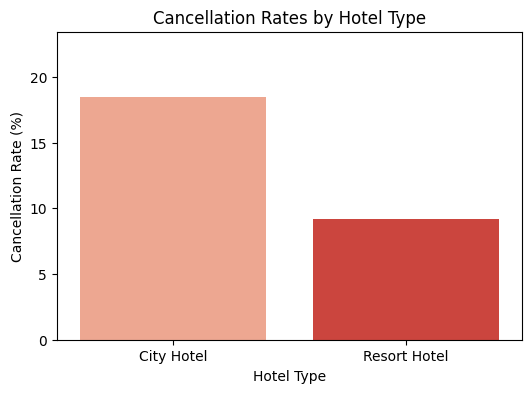

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x=cancellation_rates_per_hotel.index, y=cancellation_rates_per_hotel.values, palette="Reds", hue=cancellation_rates_per_hotel.index, legend=False)
plt.title('Cancellation Rates by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Cancellation Rate (%)')
plt.ylim(0, max(cancellation_rates_per_hotel.values) + 5)
plt.show()

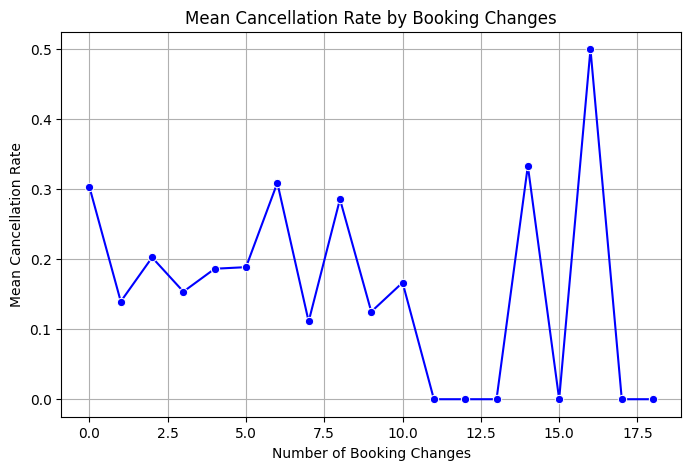

In [ ]:
# Alternative: Line Plot of Mean Cancellation Rates
mean_cancellation = df.groupby("booking_changes")["is_canceled"].mean()

plt.figure(figsize=(8, 5))
sns.lineplot(x=mean_cancellation.index, y=mean_cancellation.values, marker="o", color="blue")
plt.xlabel("Number of Booking Changes")
plt.ylabel("Mean Cancellation Rate")
plt.title("Mean Cancellation Rate by Booking Changes")
plt.grid()
plt.show()

**Insights from the Mean Cancellation Rate by Booking Changes Plot**  

1. **Overall Trend is Unstable**  
   - The cancellation rate fluctuates significantly with the number of booking changes.  
   - This suggests that **no clear linear relationship** exists between booking changes and cancellations.  

2. **Cancellation Rate is Generally Low**  
   - Most values are **below 30%**, indicating that **most bookings do not get canceled even after changes**.  
   - For some booking changes (e.g., around 10–12 changes), the cancellation rate drops to near zero.

3. **Cancellation Spikes at Higher Booking Changes**  
   - Noticeable spikes appear at **specific booking change counts (e.g., 15 and 17 changes)**.  
   - This might indicate that **certain extreme modifications in bookings** increase the likelihood of cancellation.  
   - However, these spikes could also be due to **small sample sizes** at those points.

4. **Zeros in Some Booking Change Intervals**  
   - The sudden drops to **0% cancellation** at certain booking change counts (e.g., 11–14) suggest that **some booking change counts might have very few or no cancellations at all**.
   - This could be due to data sparsity (fewer samples in those categories).  

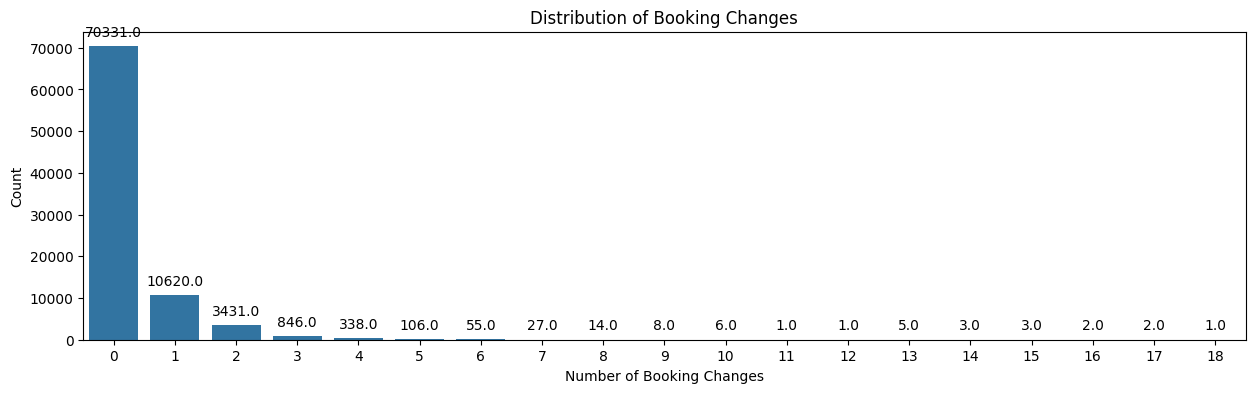

In [ ]:
plt.figure(figsize=(15, 4))  # Adjust figure size as needed
ax = sns.countplot(data=df, x=df['booking_changes'])

# Add count labels above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of Booking Changes')  # Add plot title
plt.xlabel('Number of Booking Changes')  # Add x-axis label
plt.ylabel('Count')  # Add y-axis label
plt.show()

**Insights from the Distribution of Booking Changes Plot**  

1. **Most Bookings Have 0 Changes**  

2. **Few Customers Make Multiple Changes**  
   - The count **drops sharply** as the number of modifications increases.  
   - This suggests that **frequent booking changes are uncommon**.

3. **5 or more changes are very rare**, with only a handful of bookings reaching **10+ changes**.  

**Key Takeaways**  
- The **erratic behavior** in the previous plot (Mean Cancellation Rate by Booking Changes) was likely **due to low sample sizes** at higher booking change values.  
- The spikes in cancellation rate for **15+ changes** should be interpreted with caution, as they are based on very few data points.  


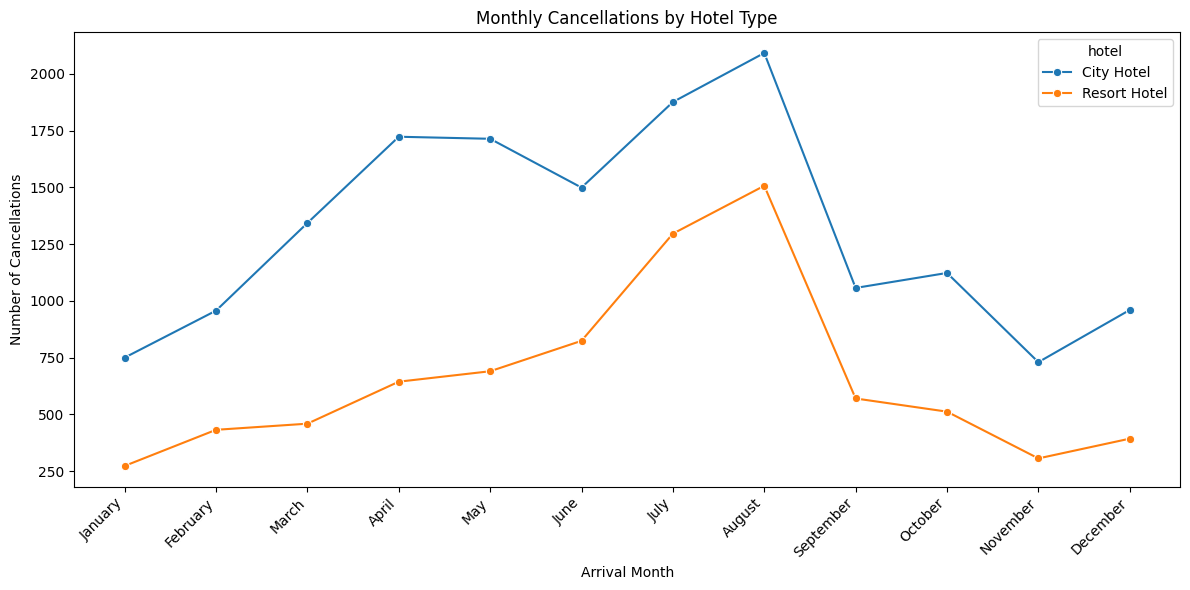

In [ ]:
# Group by month and hotel, then count cancellations
monthly_cancellations = df[df['is_canceled'] == 1].groupby(['arrival_date_month', 'hotel'])['is_canceled'].count().reset_index(name='cancellations')

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x='arrival_date_month', y='cancellations', hue='hotel', data=monthly_cancellations, marker='o')

plt.title('Monthly Cancellations by Hotel Type')
plt.xlabel('Arrival Month')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

In [ ]:
# Define the new bins and labels for lead time ranges
bins = [0, 30, 60, 90, 180, 365, float('inf')]  # Updated bins
labels = ["0-30 days", "31-60 days", "61-90 days", "90 days - 180 days", "180 days - 365 days", "365 days+"]  # Updated labels

# Add the 'Lead_Time_Range' column
df.loc[:, 'Lead_Time_Range'] = pd.cut(df['lead_time'], bins=bins, labels=labels, right=False)

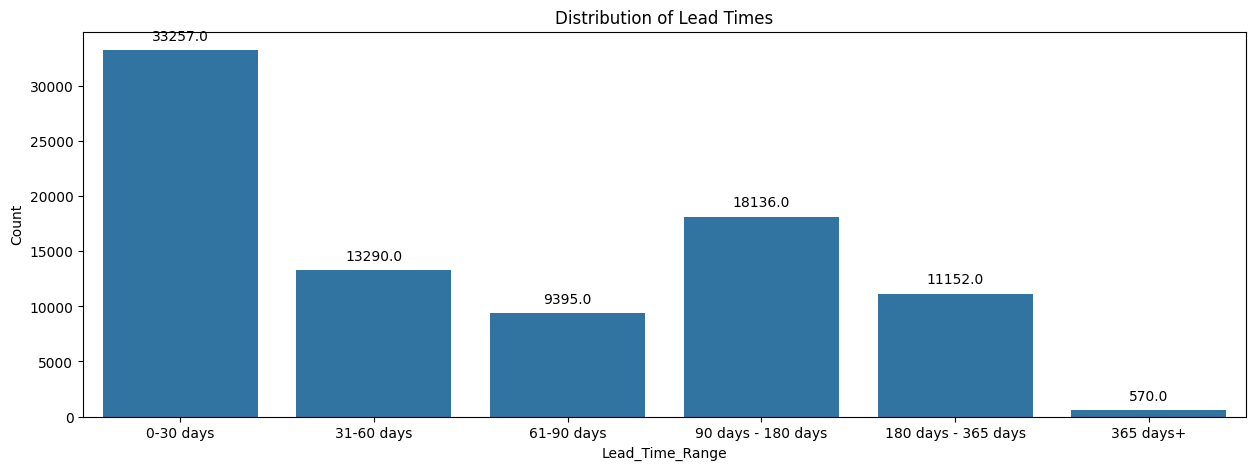

In [ ]:
plt.figure(figsize=(15, 5))
# Use the filtered DataFrame in countplot
ax = sns.countplot(data=df, x='Lead_Time_Range')  # Maintain order

# Add count labels above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of Lead Times')  # Add plot title
plt.xlabel('Lead_Time_Range')  # Add x-axis label
plt.ylabel('Count')  # Add y-axis label
plt.show()

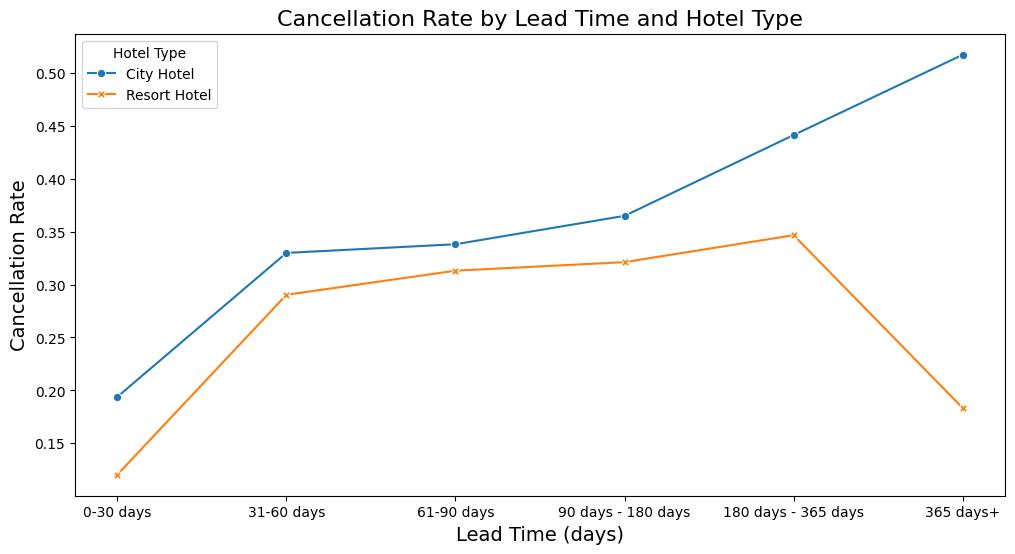

In [ ]:
# relationship between lead time ranges and cancelation

# Calculate the mean cancellation rate for each hotel type and lead time
lead_time_cancellation_by_hotel = df.groupby(['hotel', 'Lead_Time_Range'])['is_canceled'].mean().unstack(level=0)

# Plot the relationship for each hotel type
plt.figure(figsize=(12, 6))
sns.lineplot(data=lead_time_cancellation_by_hotel, markers=True, dashes=False)  # Use unstacked data for multiple lines
plt.title('Cancellation Rate by Lead Time and Hotel Type', fontsize=16)
plt.xlabel('Lead Time (days)', fontsize=14)
plt.ylabel('Cancellation Rate', fontsize=14)
plt.legend(title='Hotel Type')
plt.show()

**Observations**
1. **Cancellation Rates Increase with Lead Time**  
   - Both City and Resort Hotels show higher cancellation rates for longer lead times.  
   - The highest cancellation rates occur in the **365+ days category for City Hotels** (above 50%).  
   - Resort Hotels see a similar trend but experience a **decline** in cancellation rate for **365+ days**.



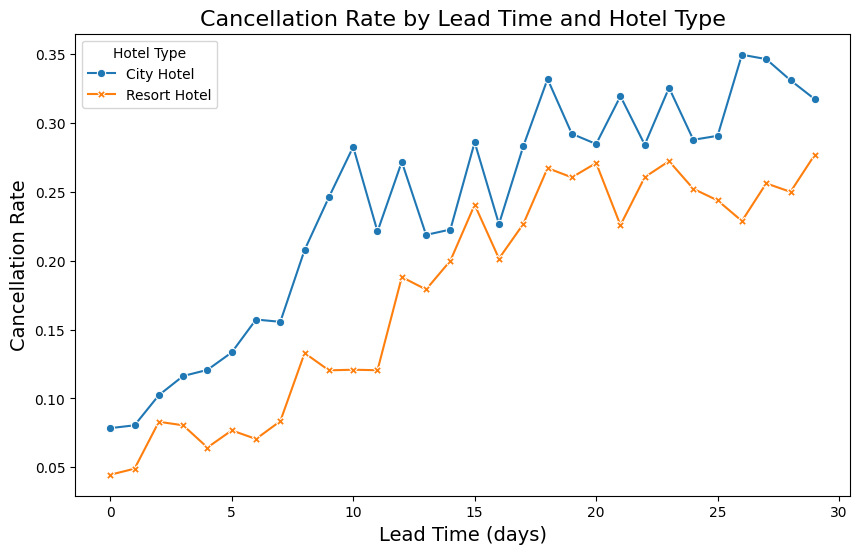

In [ ]:
# relationship between lead time and cancelation

# Calculate the mean cancellation rate for each hotel type and lead time
lead_time_cancellation_by_hotel = df.groupby(['hotel', 'lead_time'])['is_canceled'].mean().unstack(level=0)

# Limit lead time to the first 30 days for clearer visualization
lead_time_cancellation_by_hotel = lead_time_cancellation_by_hotel.head(30)

# Plot the relationship for each hotel type
plt.figure(figsize=(10, 6))
sns.lineplot(data=lead_time_cancellation_by_hotel, markers=True, dashes=False)  # Use unstacked data for multiple lines
plt.title('Cancellation Rate by Lead Time and Hotel Type', fontsize=16)
plt.xlabel('Lead Time (days)', fontsize=14)
plt.ylabel('Cancellation Rate', fontsize=14)
plt.legend(title='Hotel Type')
plt.show()

City Hotels (blue line) have a consistently higher cancellation rate than Resort Hotels (orange line).
- Cancellation rates increase with lead time, meaning that bookings made further in advance are more likely to be canceled.
- There are fluctuations in cancellation rates, but the general trend is upward.

In [ ]:
# Correlation Analysis
adr_corr, adr_p = pearsonr(df["adr"], df["is_canceled"])
stay_corr, stay_p = pearsonr(df["Stay_Duration"], df["is_canceled"])
print(f"Pearson Correlation (ADR vs Cancellation): {adr_corr:.3f}, P-value: {adr_p:.3f}")
print(f"Pearson Correlation (Stay Duration vs Cancellation): {stay_corr:.3f}, P-value: {stay_p:.3f}")

Pearson Correlation (ADR vs Cancellation): 0.129, P-value: 0.000
Pearson Correlation (Stay Duration vs Cancellation): -0.572, P-value: 0.000


**Null Hypothesis (H₀)**:  
**ADR has no significant impact on cancellation rates.**  

**Alternative Hypothesis (H₁)**:  
**ADR has a significant impact on cancellation rates.**  


In [ ]:
# Create contingency table
contingency_table = pd.crosstab(df['adr_bins'], df['is_canceled'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Print Results
print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:\n", expected)

# Interpretation
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: ADR has a significant impact on cancellation rates.")
else:
    print("Fail to reject the null hypothesis: No significant relationship between ADR and cancellations.")


Chi-Square Statistic: 1525.4410906104054
P-value: 0.0
Degrees of Freedom: 9
Expected Frequencies Table:
 [[6.28295979e+03 2.40204021e+03]
 [2.53676762e+04 9.69832378e+03]
 [1.92547217e+04 7.36127832e+03]
 [7.65457657e+03 2.92642343e+03]
 [2.57322832e+03 9.83771678e+02]
 [7.39341958e+02 2.82658042e+02]
 [1.58430420e+02 6.05695804e+01]
 [3.40010490e+01 1.29989510e+01]
 [3.61713287e+00 1.38286713e+00]
 [1.44685315e+00 5.53146853e-01]]
Reject the null hypothesis: ADR has a significant impact on cancellation rates.


Since p-value = 0.0, we reject the null hypothesis → ADR has a significant impact on cancellations.
The Chi-Square Statistic (1525.44) is very large, reinforcing the strong association.
Higher ADR bins likely correspond to higher cancellation rates.

In [ ]:
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0          7               2015               July   
1  Resort Hotel            0         13               2015               July   
2  Resort Hotel            0         14               2015               July   
4  Resort Hotel            0          0               2015               July   
5  Resort Hotel            0          9               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
4                        27                          1   
5                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     1       1         0       0   
1                        0                     1       1         0       0   
2                        0                     2       2         0       0   
4                        0                     2       2         0       0   
5                        0                     2       2         0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     GBR         Direct               Direct                  0   
1   BB     GBR      Corporate            Corporate                  0   
2   BB     GBR      Online TA                TA/TO                  0   
4   BB     PRT         Direct               Direct                  0   
5   FB     PRT         Direct               Direct                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  A   
1                       0                               0                  A   
2                       0                               0                  A   
4                       0                               0                  C   
5                       0                               0                  C   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                0   No Deposit      0        0   
1                  A                0   No Deposit    304        0   
2                  A                0   No Deposit    240        0   
4                  C                0   No Deposit      0        0   
5                  C                0   No Deposit    303        0   

   days_in_waiting_list customer_type  adr  required_car_parking_spaces  \
0                     0     Transient   75                            0   
1                     0     Transient   75                            0   
2                     0     Transient   98                            0   
4                     0     Transient  107                            0   
5                     0     Transient  103                            0   

   total_of_special_requests reservation_status reservation_status_date  \
0                          0          Check-Out              2015-07-02   
1                          0          Check-Out              2015-07-02   
2                          1          Check-Out              2015-07-03   
4                          0          Check-Out              2015-07-03   
5                          1          Check-Out              2015-07-03   

  arrival_date adr_bins  Stay_Duration  total_booked_days  total_rate  \
0   2015-07-01   50-100              1                  1          75   
1   2015-07-01   50-100              1                  1          75   
2   2015-07-01   50-100              2                  2         196   
4   2015-07-01  100-150              2                  2         214   
5   2015-07-01  100-150              2                  2         206   

  Lead_Time_Range  
0  

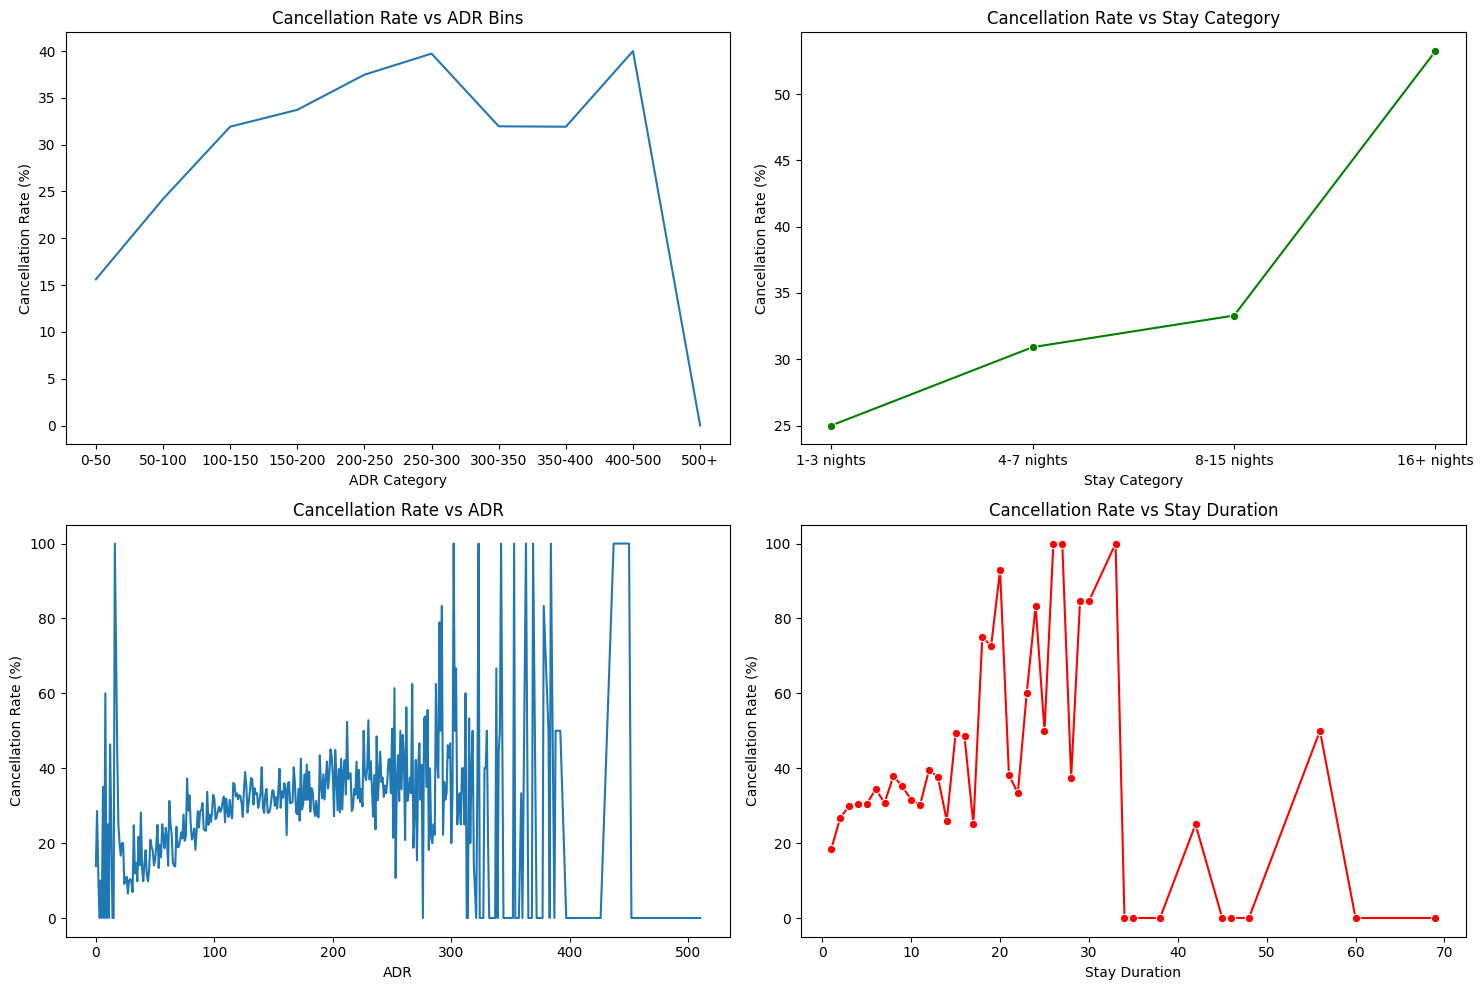

In [ ]:
# Compute Cancellation Rates
adr_bins_cancellation_rates = df.groupby("adr_bins")["is_canceled"].mean() * 100
df["stay_category"] = pd.cut(df["total_booked_days"], bins=[0, 3, 7, 15, np.inf], labels=["1-3 nights", "4-7 nights", "8-15 nights", "16+ nights"])
stay_cat_cancellation_rates = df.groupby("stay_category")["is_canceled"].mean() * 100

adr_cancellation_rates = df.groupby("adr")["is_canceled"].mean() * 100
stay_cancellation_rates = df.groupby("total_booked_days")["is_canceled"].mean() * 100

# Create a 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Cancellation Rate vs ADR Bins
sns.lineplot(ax=axes[0, 0], x=adr_bins_cancellation_rates.index, y=adr_bins_cancellation_rates.values, palette="Blues")
axes[0, 0].set_xlabel("ADR Category")
axes[0, 0].set_ylabel("Cancellation Rate (%)")
axes[0, 0].set_title("Cancellation Rate vs ADR Bins")

# Plot 2: Cancellation Rate vs Stay Category
sns.lineplot(ax=axes[0, 1], x=stay_cat_cancellation_rates.index, y=stay_cat_cancellation_rates.values, marker="o", color="green")
axes[0, 1].set_xlabel("Stay Category")
axes[0, 1].set_ylabel("Cancellation Rate (%)")
axes[0, 1].set_title("Cancellation Rate vs Stay Category")

# Plot 3: Cancellation Rate vs ADR (Raw ADR values)
sns.lineplot(ax=axes[1, 0], x=adr_cancellation_rates.index, y=adr_cancellation_rates.values, palette="Blues")
axes[1, 0].set_xlabel("ADR")
axes[1, 0].set_ylabel("Cancellation Rate (%)")
axes[1, 0].set_title("Cancellation Rate vs ADR")

# Plot 4: Cancellation Rate vs Stay Duration
sns.lineplot(ax=axes[1, 1], x=stay_cancellation_rates.index, y=stay_cancellation_rates.values, marker="o", color="red")
axes[1, 1].set_xlabel("Stay Duration")
axes[1, 1].set_ylabel("Cancellation Rate (%)")
axes[1, 1].set_title("Cancellation Rate vs Stay Duration")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


**1️⃣ Cancellation Rate vs ADR Bins (Top-Left Plot)**  
- The cancellation rate **increases with ADR (Average Daily Rate)** up to a certain point.  
- The highest cancellation rate is around **250-300 ADR**, after which there is a slight decline and fluctuation.  
- Higher ADR categories seem to have more cancellations, suggesting that **expensive bookings are more likely to be canceled**.

**2️⃣ Cancellation Rate vs ADR (Bottom-Left Plot)**
- The raw cancellation rate against ADR is **very noisy and fluctuates significantly**.
- Despite fluctuations, there seems to be an **upward trend**, meaning **higher ADR correlates with higher cancellation rates**.
- There are **sharp spikes and drops**, which may be due to **low sample sizes for certain ADR values**.

**Insight:**  
- Some extreme ADR values may have **very few bookings**, leading to misleading spikes.
**Insight:**  
- Customers who book expensive rooms might be more likely to cancel, possibly due to affordability concerns, flexible travel plans, or booking multiple hotels and choosing later.

---
 **3️⃣ Cancellation Rate vs Stay Category (Top-Right Plot)**
- Short stays (1-3 nights) have the **lowest cancellation rate (~25%)**.
- Medium stays (4-7 nights, 8-15 nights) see a **gradual increase** in cancellation rate.
- **Very long stays (16+ nights) have the highest cancellation rate (~50%)**.

**Insight:**  
- **Short stays are more committed**, likely because they are for business or urgent travel.
- **Longer stays are more prone to cancellation**, possibly because travelers make speculative bookings or plans change frequently.


**4️⃣ Cancellation Rate vs Stay Duration (Bottom-Right Plot)**
- The cancellation rate **gradually increases for stay durations up to ~30 nights**.
- **A sharp drop occurs after 30 nights**, with some fluctuations beyond that.
- **Many erratic spikes suggest data sparsity at longer durations**.

**Insight:**  
- **Customers staying around 30 nights have the highest cancellation probability**.
- The **erratic behavior beyond 30 nights may indicate fewer data points**, so conclusions here should be taken with caution.


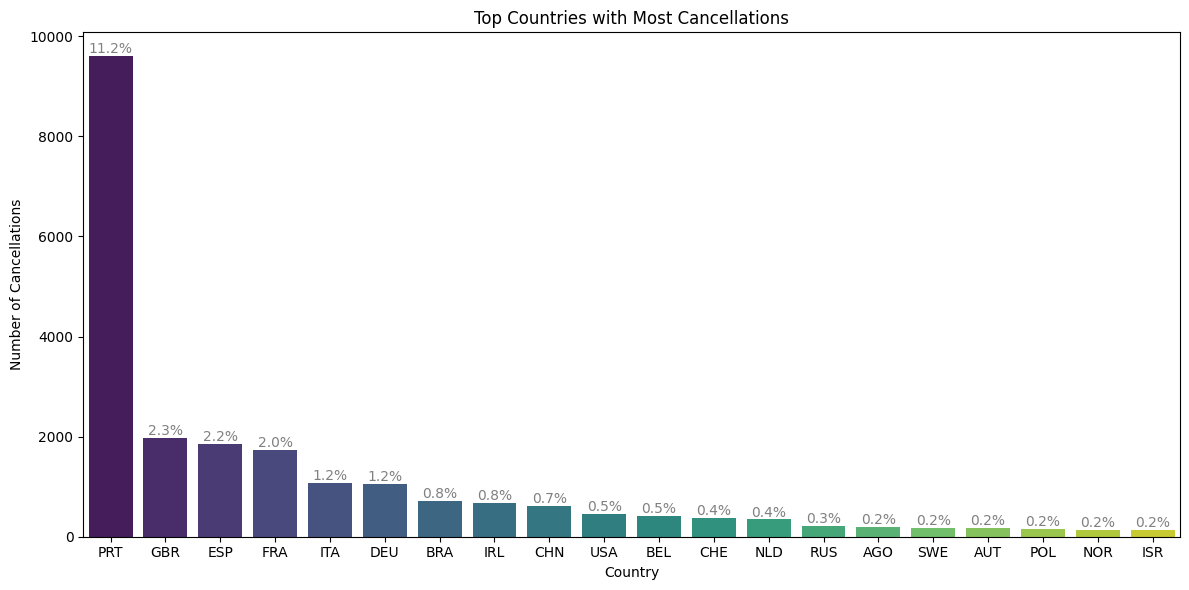

In [ ]:
# Calculate cancellations for the top 10 countries
country_cancellations = df[df['is_canceled'] == 1]['country'].value_counts().head(20)

# Calculate percentages relative to total bookings
total_bookings_per_country = df['country'].value_counts()
country_cancellations_percentage = (country_cancellations / total_bookings) * 100

plt.figure(figsize=(12, 6))

# Sort the bars by the number of cancellations
ax = sns.barplot(x=country_cancellations.index, y=country_cancellations.values,
                 order=country_cancellations.index, palette="viridis", legend=False)

plt.title('Top Countries with Most Cancellations')
plt.xlabel('Country')
plt.ylabel('Number of Cancellations')

# Add percentage labels on top of each bar
for p, percentage in zip(ax.patches, country_cancellations_percentage):
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='gray', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()


1. **Portugal (PRT) dominates** with 11.2% of total cancellations.  
2. **UK (GBR), Spain (ESP), and France (FRA)** follow with 2-2.3% each.  
3. Other notable countries include **Italy (ITA), Germany (DEU), Brazil (BRA), and China (CHN)**.  
4. The USA (0.5%) has relatively fewer cancellations.  
5. Countries like **Russia (RUS), Angola (AGO), and Sweden (SWE)** have minimal cancellations.  


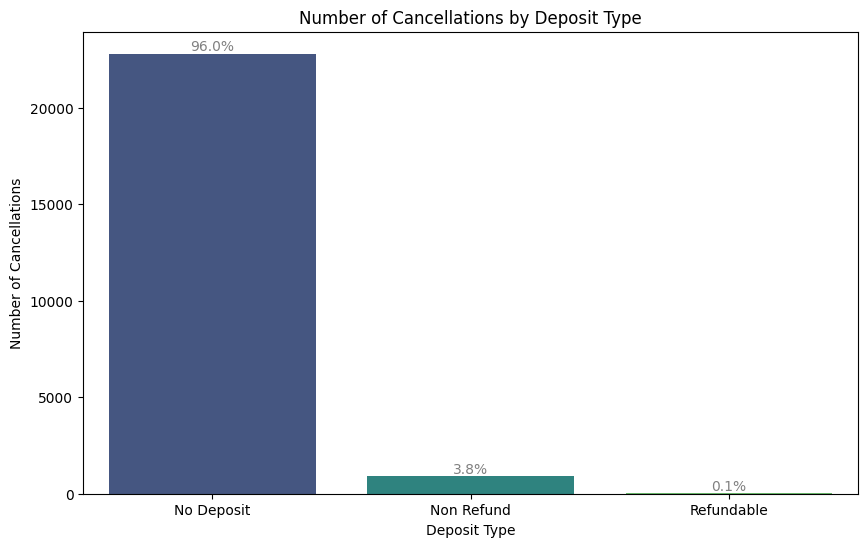

In [ ]:
# Filter to include only canceled bookings
canceled_bookings = df[df['is_canceled'] == 1]
deposit_cancellations_count = canceled_bookings['deposit_type'].value_counts()

# Calculate percentages
total_cancellations = deposit_cancellations_count.sum()
deposit_cancellations_percentage = (deposit_cancellations_count / total_cancellations) * 100

# Create the count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='deposit_type', data=canceled_bookings, order=deposit_cancellations_count.index, palette='viridis')

# Add percentage labels on top of each bar
for p, percentage in zip(ax.patches, deposit_cancellations_percentage):
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='gray', xytext=(0, 5),
                textcoords='offset points')

plt.title('Number of Cancellations by Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('Number of Cancellations')
plt.show()

deposit_type
No Deposit    0.268970
Non Refund    0.944099
Refundable    0.270833
Name: is_canceled, dtype: float64


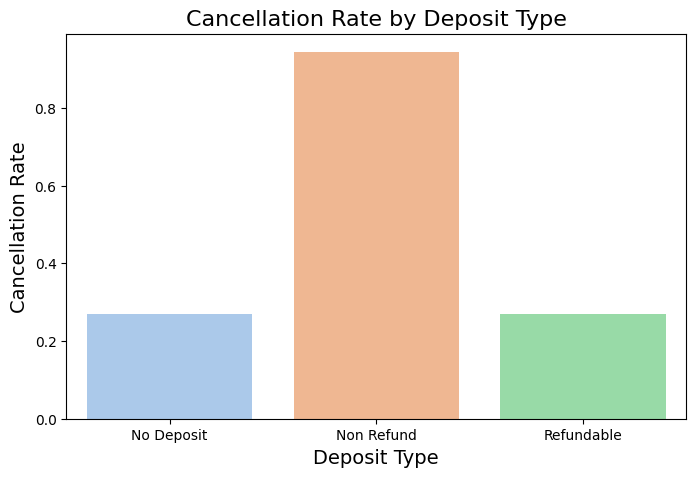

In [ ]:
# relationship between deposit type and cancellation
deposit_cancel = df.groupby('deposit_type')['is_canceled'].mean()
print(deposit_cancel)

# Plot the relationship
plt.figure(figsize=(8, 5))
sns.barplot(x=deposit_cancel.index, y=deposit_cancel.values, palette='pastel', hue = deposit_cancel.index, legend=False )
plt.title('Cancellation Rate by Deposit Type', fontsize=16)
plt.xlabel('Deposit Type', fontsize=14)
plt.ylabel('Cancellation Rate', fontsize=14)
plt.show()


-  **Non-Refundable deposits** have the highest cancellation rate (almost 90%),
- **No Deposit and Refundable bookings** show similar, lower cancellation rates (~25-30%)

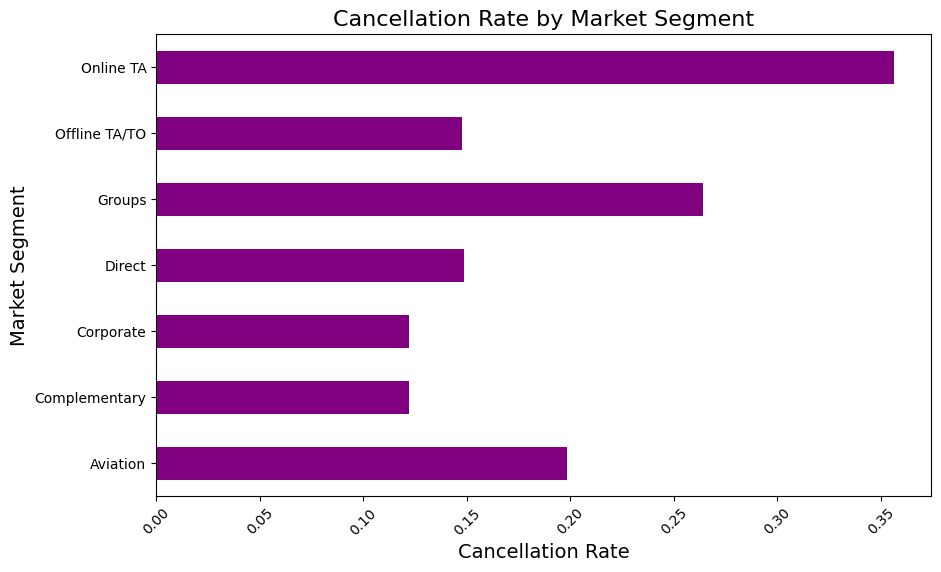

In [ ]:
# Group by market_segment and calculate the mean cancellation rate
market_cancellation = df.groupby('market_segment')['is_canceled'].mean()

# Plot the relationship
plt.figure(figsize=(10, 6))
market_cancellation.plot(kind='barh',color="purple")
plt.title('Cancellation Rate by Market Segment', fontsize=16)
plt.xlabel('Cancellation Rate', fontsize=14)
plt.ylabel('Market Segment', fontsize=14)
plt.xticks(rotation=45)
plt.show()


- **Online TA has the highest cancellation rate**, nearing 0.35, which suggests it's a segment where cancellations are a notable challenge.
- **Groups also show elevated cancellation rates**, slightly above 0.20. Addressing cancellations in group bookings might yield improvements.
- **The Aviation segment has a moderate cancellation rate** of around 0.15.
- **offline ta/to, Direct, Corporate, and Complementary bookings display similar, lower cancellation rates**

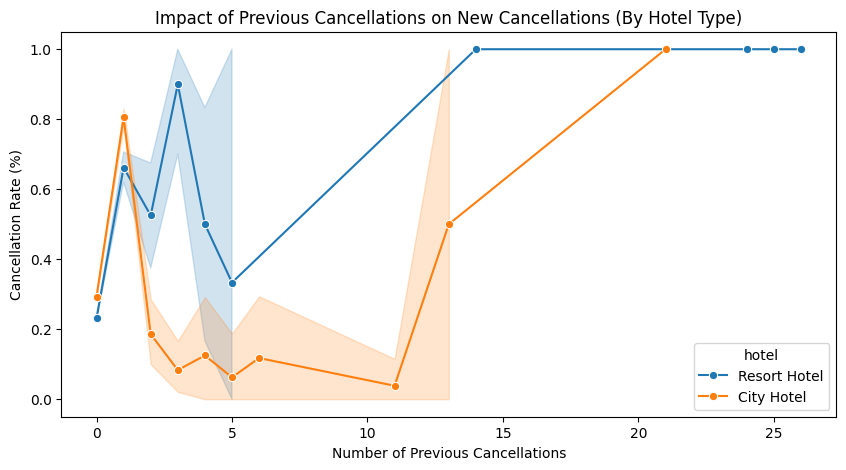

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x='previous_cancellations', y='is_canceled', hue='hotel', data=df, marker="o")
plt.title('Impact of Previous Cancellations on New Cancellations (By Hotel Type)')
plt.xlabel('Number of Previous Cancellations')
plt.ylabel('Cancellation Rate (%)')
plt.show()



- **Resort Hotels**: Cancellation rates show variability early on, but after around 13 prior cancellations, the rate escalates sharply to 100%. This pattern suggests a high likelihood of repeat cancellations after multiple instances, possibly hinting at behavioral trends for certain customers.

- **City Hotels**: Unlike Resort Hotels, the cancellation rate for City Hotels starts lower, decreases slightly, and then progressively increases. It stabilizes at 100% after 20 prior cancellations. This steadier climb could reflect a different clientele or booking behavior.

- **Confidence Intervals**: The shaded areas highlight variability or uncertainty in the data. Resort Hotels show wider fluctuations, indicating less predictability, while City Hotels exhibit more consistent trends.

In [ ]:
#Cancellation Rate by Repeat Guest Status
repeat_cancel = df.groupby('is_repeated_guest')['is_canceled'].mean() * 100

# Convert the Series to a DataFrame for easier plotting with seaborn
repeat_cancel_df = repeat_cancel.reset_index(name='cancellation_rate')
repeat_cancel_df['is_repeated_guest'] = repeat_cancel_df['is_repeated_guest'].map({0: 'Not Repeated Guest', 1: 'Repeated Guest'})

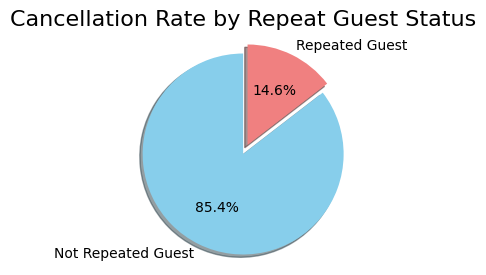

In [ ]:
labels = ['Not Repeated Guest', 'Repeated Guest']
sizes = repeat_cancel.values
colors = ['skyblue', 'lightcoral']
explode = (0.1, 0)  # Only "explode" the 1st slice (Not Repeated Guest)

plt.figure(figsize=(5, 3))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Cancellation Rate by Repeat Guest Status', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

repeated guest have a lesser chance of cancelling their bookings

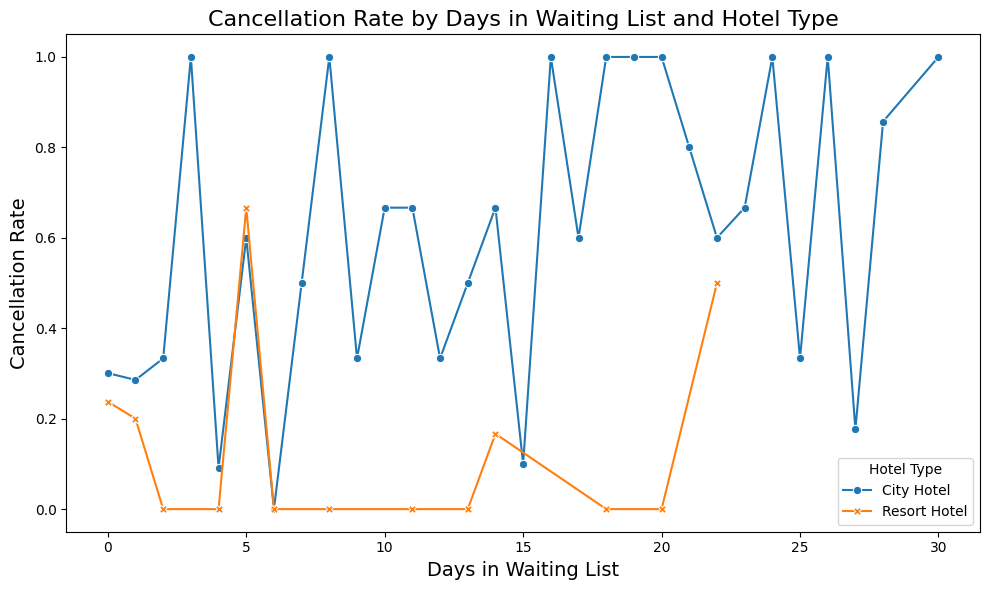

In [ ]:

# relationship between days_in_waiting_list and cancelation

# Calculate the mean cancellation rate for each hotel type and days in waiting list
waiting_list_cancellation_by_hotel = df.groupby(['hotel', 'days_in_waiting_list'])['is_canceled'].mean().unstack(level=0)

waiting_list_cancellation_by_hotel = waiting_list_cancellation_by_hotel.loc[waiting_list_cancellation_by_hotel.index <= 30]  # Use .loc for index-based filtering

plt.figure(figsize=(10, 6))
sns.lineplot(data=waiting_list_cancellation_by_hotel, markers=True, dashes=False)
plt.title('Cancellation Rate by Days in Waiting List and Hotel Type', fontsize=16)
plt.xlabel('Days in Waiting List', fontsize=14)
plt.ylabel('Cancellation Rate', fontsize=14)
plt.legend(title='Hotel Type')
#plt.xticks(waiting_list_cancellation_by_hotel.index) # Show all x-axis ticks
plt.tight_layout()
plt.show()



- **City Hotels:** The cancellation rate fluctuates significantly and often reaches the maximum rate of 1.0. This indicates higher variability and a tendency for last-minute decisions among this segment.

- **Resort Hotels:** In contrast, the cancellation rate is generally more stable and does not hit the maximum rate. This stability suggests more predictable booking behavior, potentially reflecting the planning nature of resort stays.


<Axes: xlabel='is_canceled', ylabel='total_of_special_requests'>

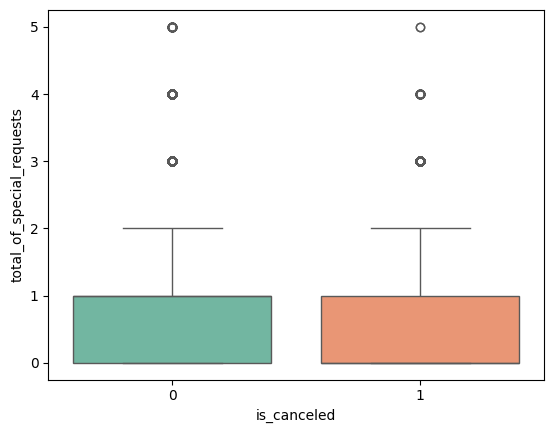

In [ ]:
sns.boxplot(x='is_canceled', y='total_of_special_requests', data=df, palette='Set2')

the box plot shows there is no much relationship between total special request and is canceled




## Price Analysis

In [ ]:
 #Revenue Analysis - Which hotel generates more revenue, and for which month?
monthly_revenue = df.groupby(['arrival_date_month', 'hotel'])['total_rate'].sum().reset_index()
monthly_revenue

arrival_date_month         hotel  total_rate
0             January    City Hotel      471198
1             January  Resort Hotel      225645
2            February    City Hotel      680926
3            February  Resort Hotel      341612
4               March    City Hotel      960139
5               March  Resort Hotel      446995
6               April    City Hotel     1183115
7               April  Resort Hotel      640160
8                 May    City Hotel     1318560
9                 May  Resort Hotel      756325
10               June    City Hotel     1242987
11               June  Resort Hotel     1068759
12               July    City Hotel     1456369
13               July  Resort Hotel     2325528
14             August    City Hotel     1734802
15             August  Resort Hotel     2853691
16          September    City Hotel     1077185
17          September  Resort Hotel      905654
18            October    City Hotel      954296
19            October  Resort Hotel      536869
20           November    City Hotel      583947
21           November  Resort Hotel      308588
22           December    City Hotel      560805
23           December  Resort Hotel      361093

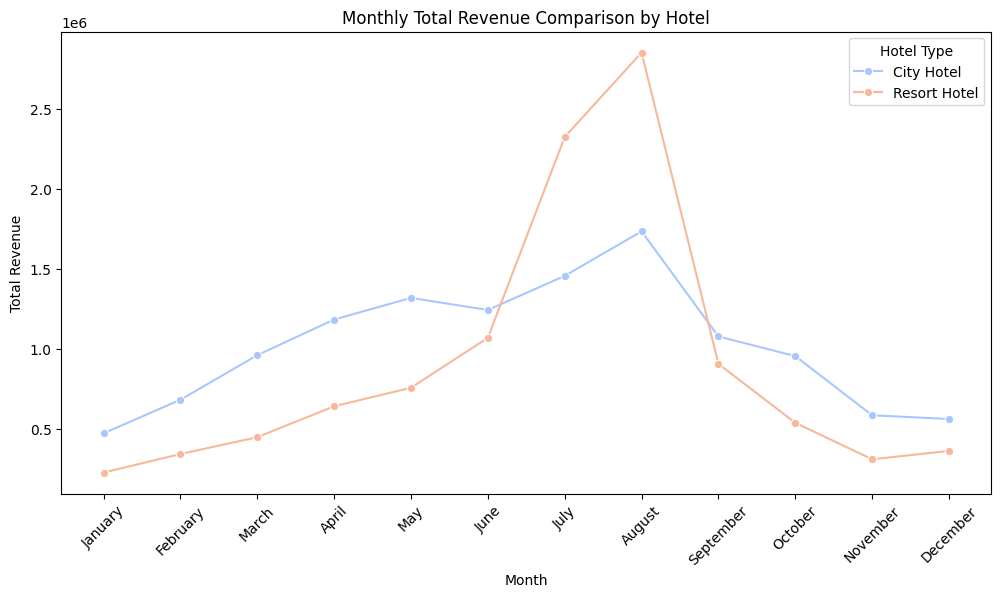

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_date_month', y='total_rate', hue='hotel', data=monthly_revenue, marker='o', palette='coolwarm')
plt.title('Monthly Total Revenue Comparison by Hotel')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.legend(title="Hotel Type")
plt.show()


**Monthly Total Revenue Comparison by Hotel**  
- **General Trend**:  
  - Similar to monthly hotel bookings, Both City and Resort Hotels experience an upward trend in total revenue from January to August, followed by a sharp decline from September onward.  
- **Resort Hotel Peak Revenue**:  
  - Resort Hotels have a significant peak in revenue around **July and August**, likely due to increased tourism and holiday travel.  
- **City Hotel Revenue Consistency**:  
  - City Hotels show a steadier increase, peaking in **August**, but do not experience as dramatic a drop as Resort Hotels.  
- **Off-Peak Season (September - December)**:  
  - Revenue declines for both hotels, suggesting lower bookings post-summer vacation season.  

lets check if the trends are actually similar between hotel bookings and hotel prices



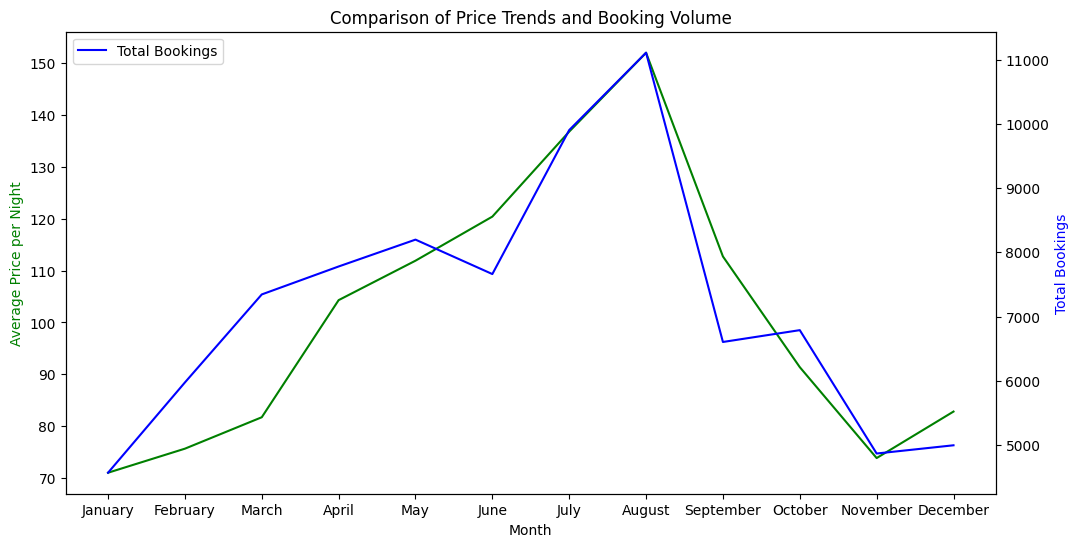

In [ ]:
#Compare Price Trends with Booking Volume to confirm if higher prices align with higher demand

# Aggregate average price and booking counts per month
monthly_trends = df.groupby('arrival_date_month').agg({
    'adr': 'mean',  # Average price per night
    'hotel': 'count'  # Total number of bookings
}).rename(columns={'hotel': 'total_bookings'})

# Plot price vs. booking volume
fig, ax1 = plt.subplots(figsize=(12,6))

ax2 = ax1.twinx()
ax1.plot(monthly_trends.index, monthly_trends['adr'], 'g-', label="Average Price")
ax2.plot(monthly_trends.index, monthly_trends['total_bookings'], 'b-', label="Total Bookings")

ax1.set_xlabel('Month')
ax1.set_ylabel('Average Price per Night', color='g')
ax2.set_ylabel('Total Bookings', color='b')
plt.title('Comparison of Price Trends and Booking Volume')
plt.xticks(rotation=45)
plt.legend(loc="upper left")
plt.show()


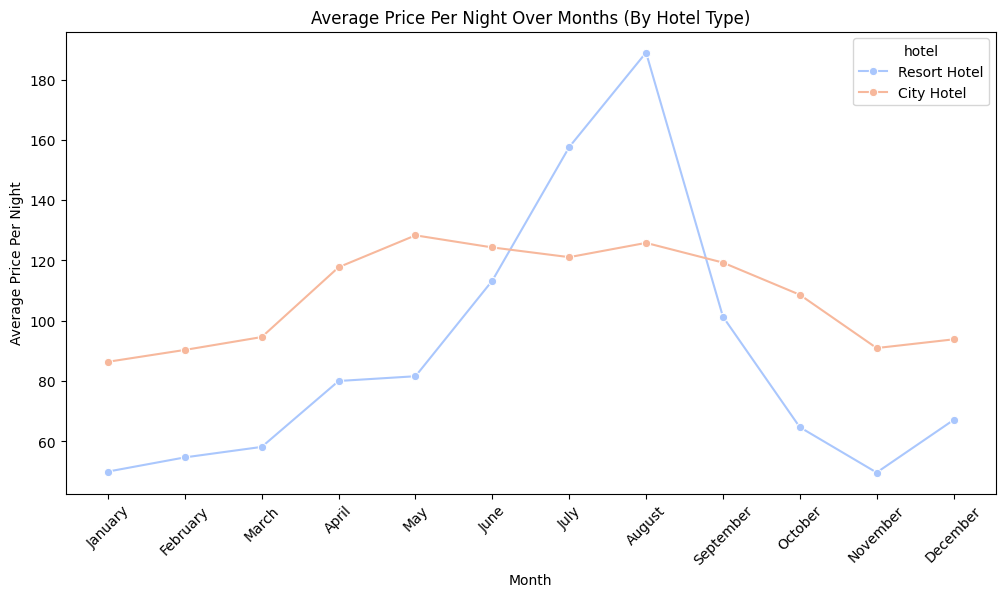

In [ ]:
# Price Per Night Over the Year (By Hotel)
plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data=df, estimator='mean', errorbar=None, marker='o', palette='coolwarm')
plt.title('Average Price Per Night Over Months (By Hotel Type)')
plt.xlabel('Month')
plt.ylabel('Average Price Per Night')
plt.xticks(rotation=45)
plt.show()



**Average Price Per Night Over Months (By Hotel Type)**  
- **Resort Hotels' High Price Volatility**:  
  - Resort Hotels see a sharp increase in average price per night, peaking in **August (~190)**, followed by a steep decline in September. This aligns with the revenue peak seen earlier.  
- **City Hotels' More Stable Pricing**:  
  - City Hotels maintain relatively stable pricing, peaking around **May-June (~130)** before a gradual decline towards the year-end.  
- **Seasonal Pricing Strategy**:  
  - The Resort Hotel pricing strategy is likely driven by peak-season demand, whereas City Hotels maintain steadier pricing, catering to business travelers.

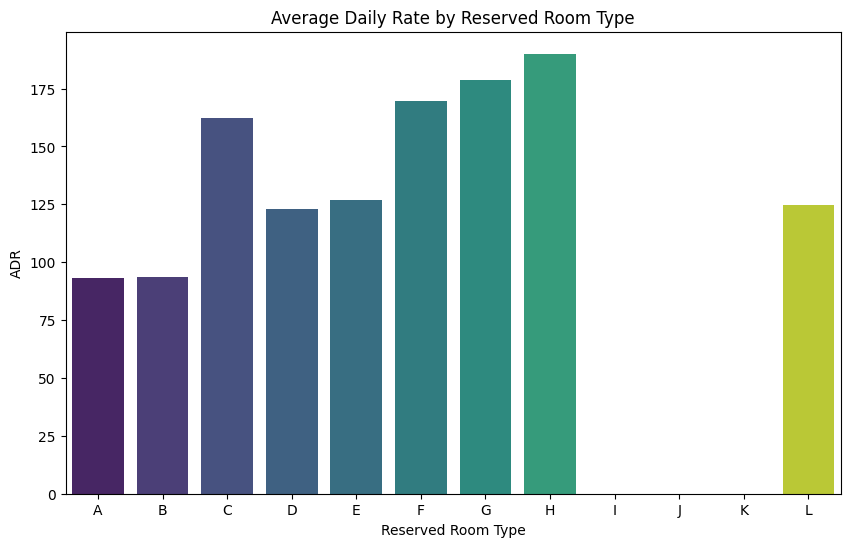

reserved_room_type
A     93.134015
B     93.564036
C    162.231111
D    122.856819
E    127.006555
F    169.535957
G    178.504941
H    190.064407
I           NaN
J           NaN
K           NaN
L    124.666667
Name: adr, dtype: float64


In [ ]:
# Calculate average ADR for each reserved_room_type
room_adr = df.groupby('reserved_room_type')['adr'].mean().sort_index()

# Plot the average ADR
plt.figure(figsize=(10, 6))
sns.barplot(x=room_adr.index, y=room_adr.values, palette='viridis')
plt.title('Average Daily Rate by Reserved Room Type')
plt.xlabel('Reserved Room Type')
plt.ylabel('ADR')
plt.show()

# Print the average ADR values for reference
print(room_adr)

**Categorization of `reserved_room_type`:**
1. **Low ADR Rooms (Budget Category)**
   - Room Types: `A`, `B`
   - ADR is the lowest (~90). These are likely **standard or economy rooms**.

2. **Mid-Range ADR Rooms (Moderate Category)**
   - Room Types: `D`, `E`, `L`
   - ADR is between ~120-130. These are likely **comfort or deluxe rooms**.

3. **High ADR Rooms (Premium Category)**
   - Room Types: `C`, `F`, `G`
   - ADR ranges from ~150-175. These could be **superior or premium rooms**.

4. **Luxury ADR Rooms (Luxury Category)**
   - Room Types: `H`
   - Highest ADR (~185+). This is likely a **luxury suite**.

5. **Missing Data or Unclear Rooms**
   - Room Types: `I`, `J`, `K`
   - These have **no bookings**.


lets check the room types by hotel types

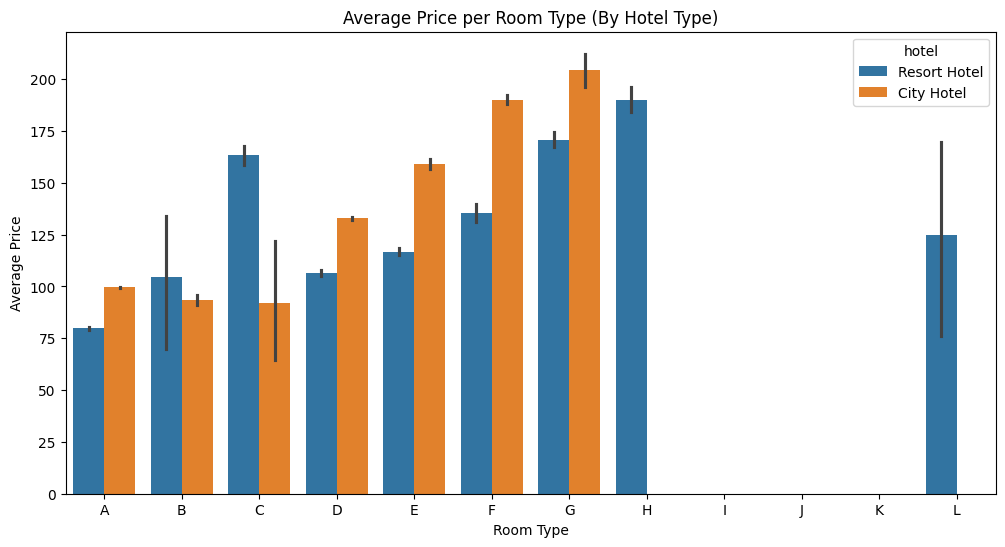

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='reserved_room_type', y='adr', hue='hotel', data=df)
plt.title('Average Price per Room Type (By Hotel Type)')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.show()


From the new chart, we can see that the average price per room type varies between Resort Hotels and City Hotels. This suggests that categorizing reserved_room_type into rigid groups (like Budget, Moderate, Premium, Luxury) may not fully capture the differences in pricing between hotel types.

-  **Room Type G is the Most Expensive for City Hotels & Second Most Expensive for Resort Hotels after Room Type H**  

- **City Hotels Generally Have Higher Prices than Resort Hotels**  
   - **Exception**: Resort Hotels charge more for **Room Types B and C** and exclusively offer **Room Types H and L**, which are among the highest-priced rooms.  
   - **Room Types A, B, and D** have similar pricing in both hotel types,

- **Room Type L has the highest price variability**


- both hotels might just have the same room type id but the room ids arent similar


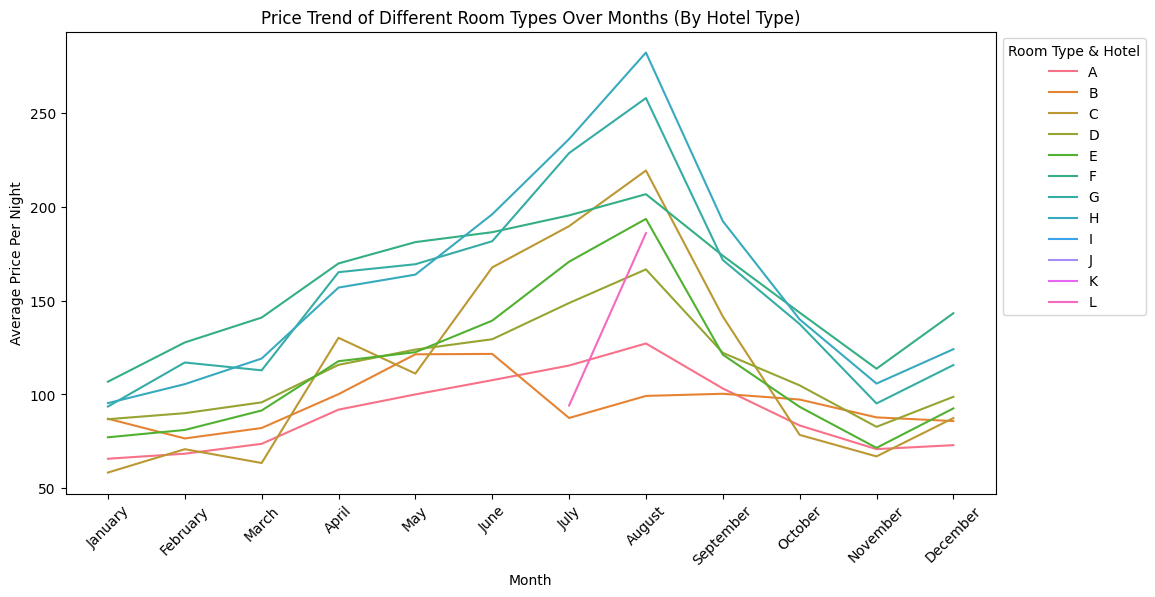

In [ ]:
# Monthly Price Trends Per Room Type - style='hotel'
plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='reserved_room_type', data=df, estimator='mean', errorbar=None)
plt.title('Price Trend of Different Room Types Over Months (By Hotel Type)')
plt.xlabel('Month')
plt.ylabel('Average Price Per Night')
plt.xticks(rotation=45)
plt.legend(title='Room Type & Hotel', bbox_to_anchor=(1,1))
plt.show()


As seen in earlier trends,
  - Room prices tend to increase steadily from January and peak around **July and August**, indicating **high-season demand**, possibly due to summer vacations.  
  - After **August**, prices drop significantly, reaching their lowest in **October and November**, suggesting a low-demand period.    
  - Throughout the year, **Room Type F, G and H** maintain the highest pricing
  - Prices start rising again in **December**, possibly due to holiday bookings, though they do not reach the peak levels seen in summer.  
  
The seasonal nature of Room Type L suggests it may be a special offering (e.g., a premium suite or limited-time availability). Further investigation into booking frequency and customer preferences for this room type could provide clarity.


In [ ]:
# Check the months where Room Type L appears
room_L_trends = df[df['reserved_room_type'] == 'L'].groupby('arrival_date_month')['adr'].agg(['count', 'mean']).T
room_L_trends

arrival_date_month  January  February  March  April  May  June  July  August  \
count                   0.0       0.0    0.0    0.0  0.0   0.0   4.0     2.0   
mean                    NaN       NaN    NaN    NaN  NaN   NaN  94.0   186.0   

arrival_date_month  September  October  November  December  
count                     0.0      0.0       0.0       0.0  
mean                      NaN      NaN       NaN       NaN

In [ ]:
df[df['assigned_room_type'] == 'L'].groupby('arrival_date_month')['adr'].agg(['count', 'mean']).T


arrival_date_month  January  February  March  April  May  June  July  August  \
count                   0.0       0.0    0.0    0.0  0.0   0.0   1.0     0.0   
mean                    NaN       NaN    NaN    NaN  NaN   NaN   8.0     NaN   

arrival_date_month  September  October  November  December  
count                     0.0      0.0       0.0       0.0  
mean                      NaN      NaN       NaN       NaN

Room L coincides with only being available july

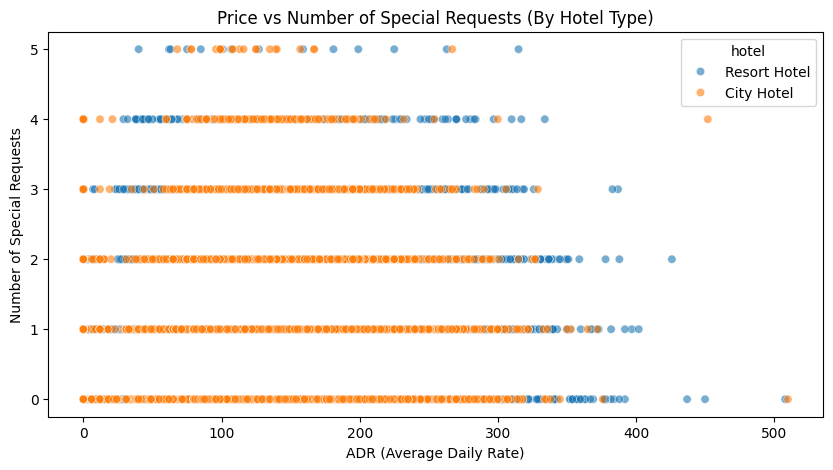

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='adr', y='total_of_special_requests', hue='hotel', data=df, alpha=0.6)
plt.title('Price vs Number of Special Requests (By Hotel Type)')
plt.xlabel('ADR (Average Daily Rate)')
plt.ylabel('Number of Special Requests')
plt.show()


 - **City Hotels (orange dots) seem to have more data points at lower ADR values**, suggesting they might be more budget-friendly.  

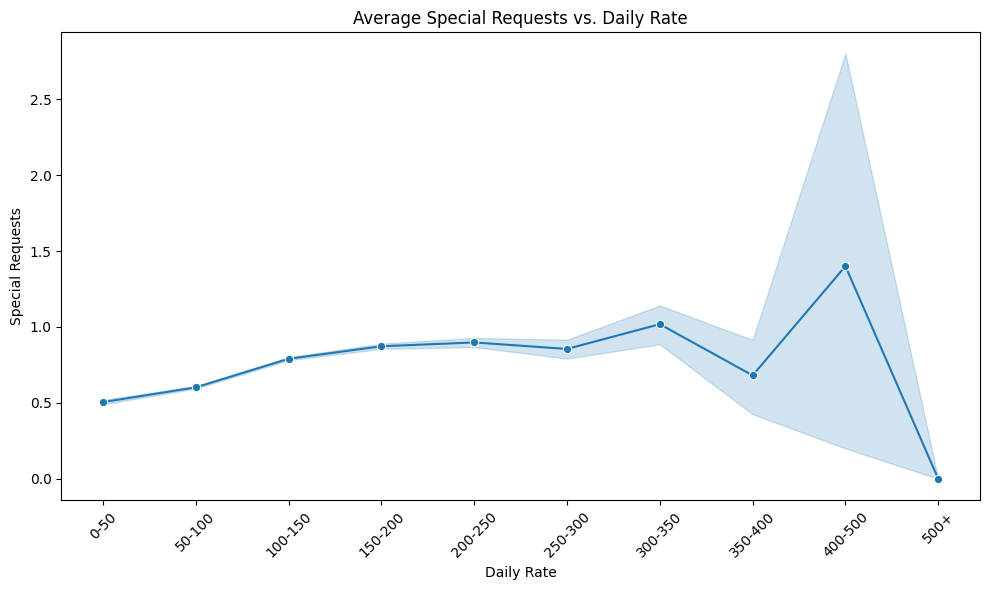

In [ ]:

plt.figure(figsize=(10, 6))
sns.lineplot(x='adr_bins', y='total_of_special_requests', data=df, marker='o')  # Use 'adr_bins' here!
plt.title('Average Special Requests vs. Daily Rate')
plt.xlabel('Daily Rate')
plt.ylabel('Special Requests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Key Insights:**
1. **Higher ADR tends to have more special requests** – The trend shows an increase in special requests as ADR rises, particularly up to the **300-350 range**.  
2. **A sharp increase at 400-500 ADR** – This suggests that guests paying premium rates may expect additional services.  
3. **Drop at 500+ ADR** – This could be due to fewer bookings in this price range, making the average less reliable.  
4. **Variance is highest in the 400-500 ADR range**, indicating that special requests fluctuate significantly for high-paying guests.  


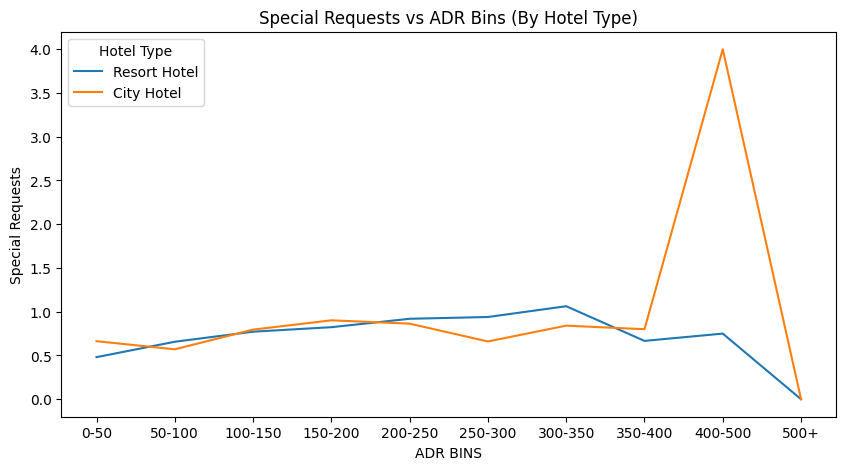

In [ ]:
# Lineplot of special requests by ADR range for each hotel type
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='adr_bins', y='total_of_special_requests', hue='hotel', ci=None)
plt.xlabel("ADR BINS")
plt.ylabel("Special Requests")
plt.title("Special Requests vs ADR Bins (By Hotel Type)")
plt.legend(title="Hotel Type")
plt.show()


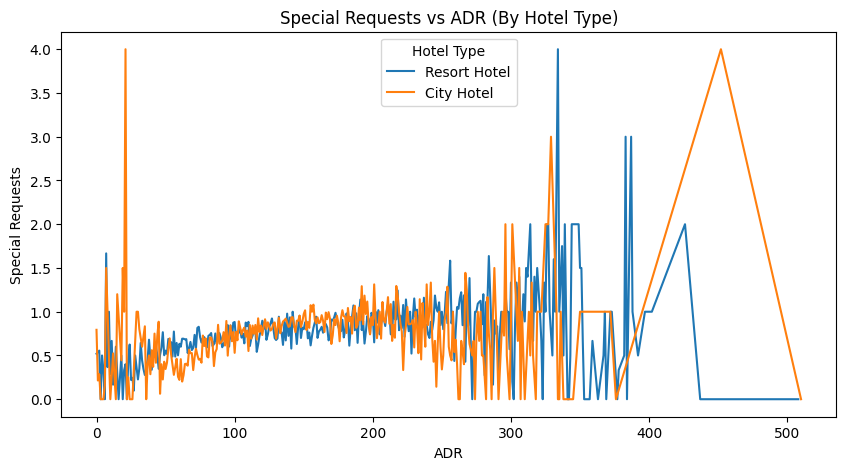

In [ ]:
# Lineplot of special requests by ADR range for each hotel type
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='adr', y='total_of_special_requests', hue='hotel', ci=None)
plt.xlabel("ADR")
plt.ylabel("Special Requests")
plt.title("Special Requests vs ADR (By Hotel Type)")
plt.legend(title="Hotel Type")
plt.show()



1. **General Trend Consistency**  
   - Both charts show that **higher ADR values tend to correspond to more special requests**.
   - However, the second chart (raw data) shows a lot of **fluctuations**, while the first chart provides a **clearer upward trend** by averaging values within ADR bins.

2. **Variance and Noise Reduction**  
   - The **second chart** reveals how special requests fluctuate across individual ADR values, showing **high variability** in the 300+ range.
   - The **first chart** smooths this variation by averaging values within bins, making the trend easier to interpret.

3. **Spike in Special Requests at ADR 400-500**  
   - In the **binned chart (first chart)**, there's a **sharp increase** in special requests at the **400-500 ADR bin**, especially for City Hotels.
   - The **raw data (second chart)** confirms this but also shows that **not all bookings in this range have high special requests**—some bookings have zero requests.

4. **Outliers' Effect**  
   - The **second chart** shows distinct peaks and dips, which are likely caused by outliers or a small number of bookings in certain ADR ranges.
   - The **first chart** smooths these effects, making the overall trend more interpretable.


In [ ]:
# Count the number of bookings in the 500+ ADR range
high_adr_counts = df[df['adr'] > 500].shape[0]
print(f"Number of bookings with ADR > 500: {high_adr_counts}")


Number of bookings with ADR > 500: 2


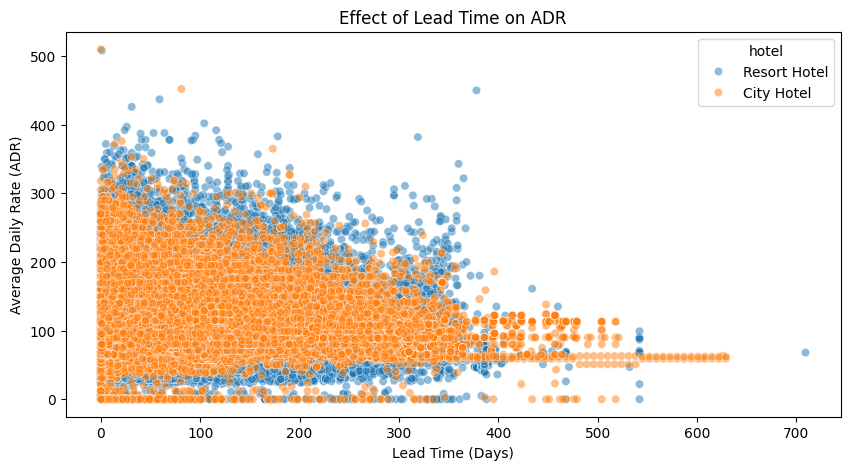

In [ ]:
 #Do bookings made well in advance have different ADRs compared to last-minute bookings?  Analysis of the Relationship Between Lead Time and ADR
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['lead_time'], y=df['adr'], hue=df['hotel'], alpha=0.5)
plt.title("Effect of Lead Time on ADR")
plt.xlabel("Lead Time (Days)")
plt.ylabel("Average Daily Rate (ADR)")
plt.show()


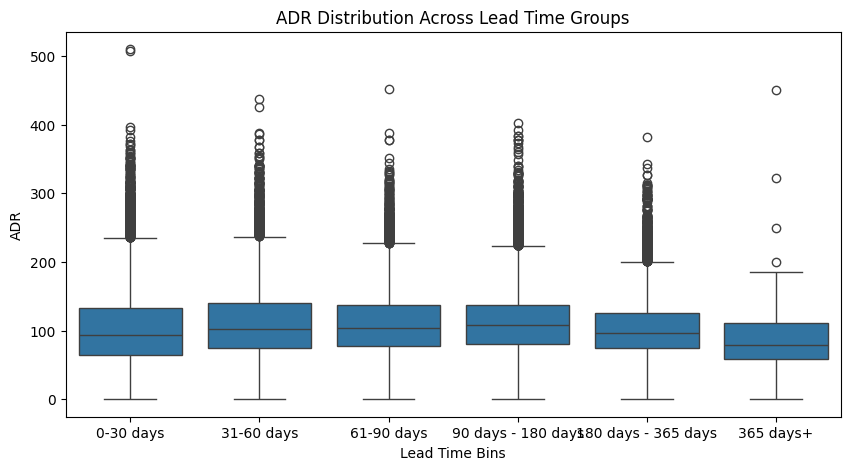

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Lead_Time_Range', y='adr', data=df)
plt.title("ADR Distribution Across Lead Time Groups")
plt.xlabel("Lead Time Bins")
plt.ylabel("ADR")
plt.show()


In [ ]:
# Pearson Correlation (Linear Relationship)
pearson_corr, pearson_p = pearsonr(df['lead_time'], df['adr'])
print(f"Pearson Correlation: {pearson_corr:.3f}, P-value: {pearson_p:.3f}")

# Spearman Correlation (Rank-Based)
spearman_corr, spearman_p = spearmanr(df['lead_time'], df['adr'])
print(f"Spearman Correlation: {spearman_corr:.3f}, P-value: {spearman_p:.3f}")


Pearson Correlation: 0.017, P-value: 0.000
Spearman Correlation: 0.098, P-value: 0.000


**Effect of Lead Time on ADR (Scatter Plot)**
   - There is a weak positive correlation between **lead time** and **Average Daily Rate (ADR)** (Pearson: 0.017, Spearman: 0.098).
   - This suggests that customers who book earlier do not consistently pay higher or lower rates, indicating that pricing might not be strongly dependent on lead time.
   - However, there is a slight downward trend, meaning that in some cases, longer lead times could be associated with lower ADRs. or they may just be outliers

**ADR Distribution Across Lead Time Groups (Box Plot)**
   - The median ADR remains relatively stable across different lead time bins.
   - There are many outliers in all lead time groups, showing a wide range of ADR values.

## Revisit Rate

In [ ]:
# Repeat guest data
# Guests who have repeated visits, have experienced a cancellation, or have previous bookings that were not canceled
repeat_guest = df[(df['is_repeated_guest'] == 1) |
                  (df['previous_cancellations'] > 0) |
                  (df['previous_bookings_not_canceled'] > 0)]

repeat_guest.shape

(4507, 39)

In [ ]:
# Extract Year-Month in YYYY-MM format
repeat_guest.loc[:, 'year_month'] = repeat_guest['arrival_date'].dt.to_period('M')
# Convert 'year_month' to string to ensure proper ordering on x-axis
repeat_guest['year_month'] = repeat_guest['year_month'].astype(str)
repeat_guest = repeat_guest.sort_values(by='year_month')

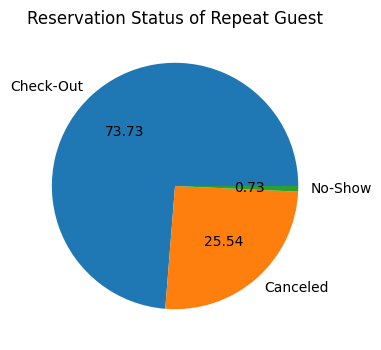

In [ ]:
# 시각화
plt.figure(figsize=(4,4))

plt.pie(
    repeat_guest['reservation_status'].value_counts(),
    labels=repeat_guest['reservation_status'].value_counts().index,
    autopct='%0.2f',
    startangle=0,
)
plt.title('Reservation Status of Repeat Guest')
plt.show()


- *Most repeat guests successfully complete their stays.* This suggests strong customer retention and loyalty.  


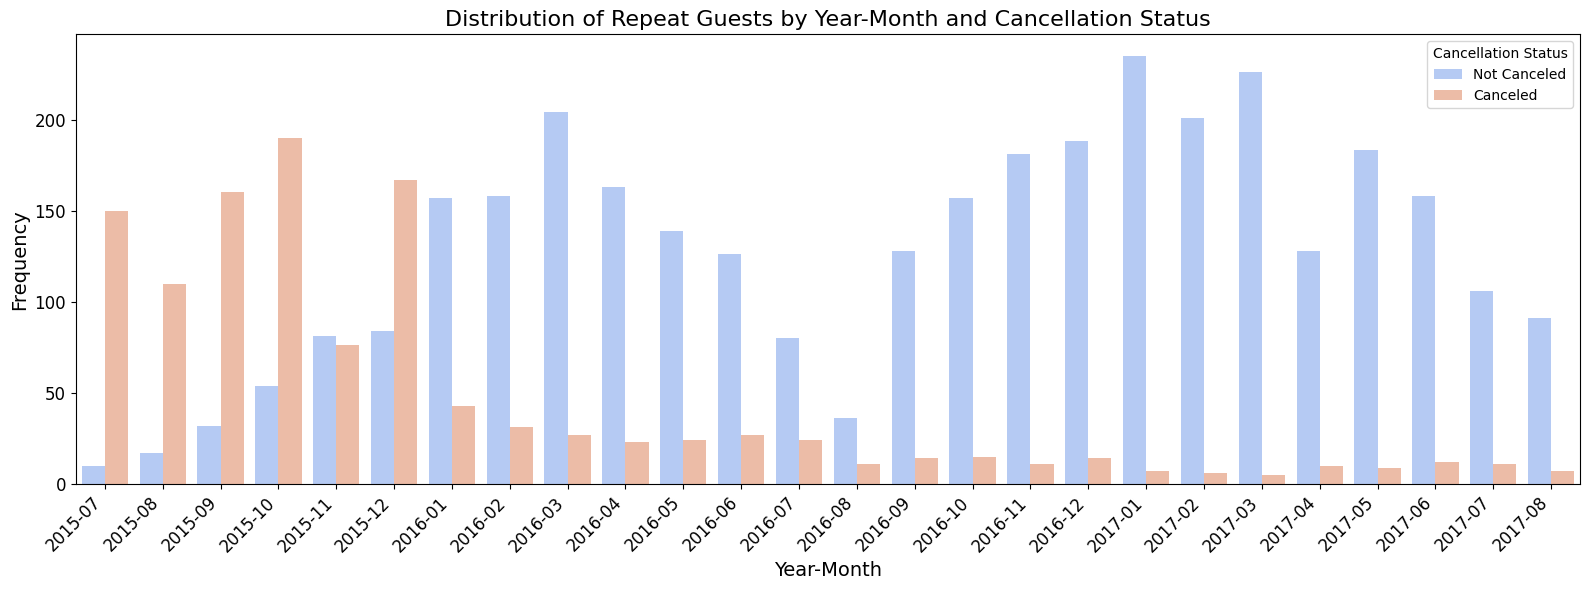

In [ ]:
# Distribution of Repeat Guests by Year-Month and Cancellation Status
plt.figure(figsize=(16, 6))
sns.countplot( data=repeat_guest, x='year_month', hue='is_canceled', palette="coolwarm")

plt.title('Distribution of Repeat Guests by Year-Month and Cancellation Status', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels
plt.yticks(fontsize=12)
plt.legend(title="Cancellation Status", labels=["Not Canceled", "Canceled"])
plt.tight_layout()
plt.show()


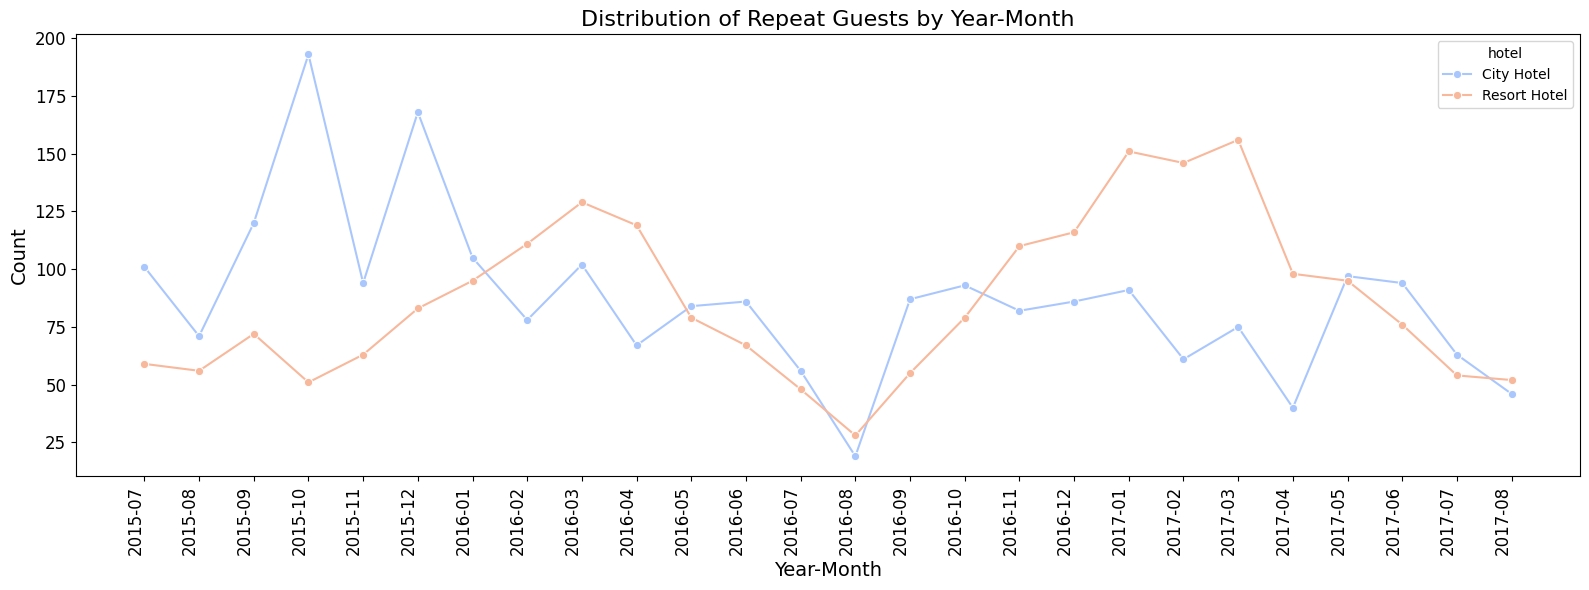

In [ ]:
# Calculate counts for each year_month and hotel
counts = repeat_guest.groupby(['year_month', 'hotel']).size().reset_index(name='count')

plt.figure(figsize=(16, 6))
sns.lineplot(data=counts, x='year_month', y='count', hue='hotel', palette="coolwarm", marker='o') #Added marker for clarity

plt.title('Distribution of Repeat Guests by Year-Month', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Count', fontsize=14) #Changed Y label to count
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

 Both hotel types exhibit significant fluctuations in the number of repeat guests over the observed period.

In [ ]:
# Extract Year-Month in YYYY-MM format
df.loc[:, 'year_month'] = df['arrival_date'].dt.to_period('M')
df['year_month'] = pd.to_datetime(df['year_month'].astype(str))
#month-year revisit rate
# Group by Month-Year and calculate revisit rate
monthly_yearly_revisit = (df.groupby('year_month')['is_repeated_guest'].mean() * 100).reset_index().rename(columns={'is_repeated_guest': 'Revisit Rate (%)'})

monthly_yearly_revisit = monthly_yearly_revisit[['year_month', 'Revisit Rate (%)']]
monthly_yearly_revisit.T

0                    1   \
year_month        2015-07-01 00:00:00  2015-08-01 00:00:00   
Revisit Rate (%)             0.790274             0.792327   

                                   2                    3   \
year_month        2015-09-01 00:00:00  2015-10-01 00:00:00   
Revisit Rate (%)             1.314854             2.155009   

                                   4                    5   \
year_month        2015-11-01 00:00:00  2015-12-01 00:00:00   
Revisit Rate (%)             5.140759             4.368175   

                                   6                    7   \
year_month        2016-01-01 00:00:00  2016-02-01 00:00:00   
Revisit Rate (%)             8.430394             5.948905   

                                   8                    9   \
year_month        2016-03-01 00:00:00  2016-04-01 00:00:00   
Revisit Rate (%)             5.611972             4.644883   

                                   10                   11  \
year_month        2016-05-01 00:00:00  2016-06-01 00:00:00   
Revisit Rate (%)             3.884814             3.812825   

                                   12                   13  \
year_month        2016-07-01 00:00:00  2016-08-01 00:00:00   
Revisit Rate (%)             2.352008             0.873764   

                                   14                   15  \
year_month        2016-09-01 00:00:00  2016-10-01 00:00:00   
Revisit Rate (%)             3.587444             3.957529   

                                   16                   17  \
year_month        2016-11-01 00:00:00  2016-12-01 00:00:00   
Revisit Rate (%)             5.842349             6.408588   

                                   18                   19  \
year_month        2017-01-01 00:00:00  2017-02-01 00:00:00   
Revisit Rate (%)             8.709794             6.367852   

                                   20                   21  \
year_month        2017-03-01 00:00:00  2017-04-01 00:00:00   
Revisit Rate (%)             6.383569             3.384842   

                                   22                   23  \
year_month        2017-05-01 00:00:00  2017-06-01 00:00:00   
Revisit Rate (%)             4.250609              4.02381   

                                   24                   25  
year_month        2017-07-01 00:00:00  2017-08-01 00:00:00  
Revisit Rate (%)             2.592758             2.224771

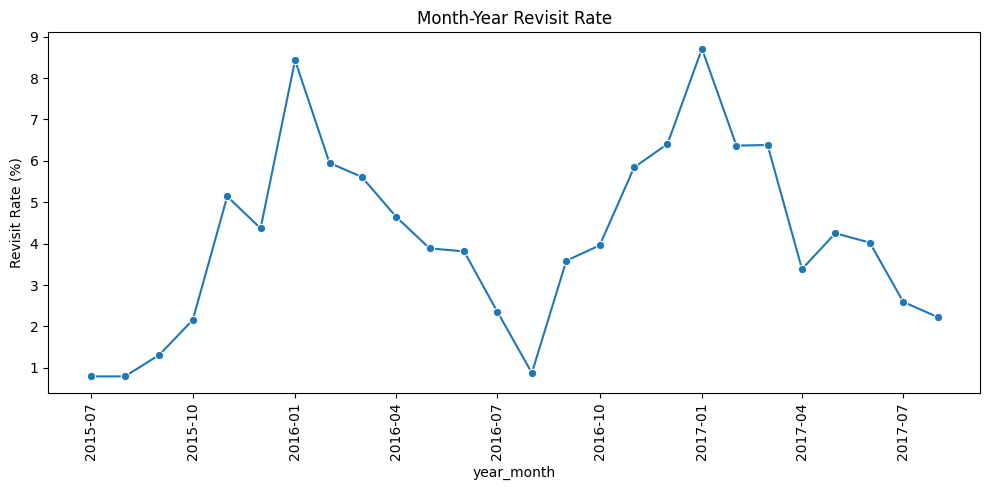

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='year_month', y='Revisit Rate (%)', data=monthly_yearly_revisit, marker='o')
plt.title('Month-Year Revisit Rate')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

   - **January 2016 and January 2017** show the highest revisit rates, exceeding **8%**
   - The overall revisit trend follows a similar seasonal pattern across years, with **dips in mid-year (July-August) and peaks around year-end and the start of the next year**.  


In [ ]:
# Pivot table to summarize cancellations per year
summary = df.pivot_table(index='arrival_date_year', columns='is_canceled', aggfunc='size', fill_value=0)

# Rename columns
summary.columns = ['Not Canceled', 'Canceled']

# Calculate total bookings and cancellation rate
summary['Total Bookings'] = summary['Not Canceled'] + summary['Canceled']
summary['Cancellation Rate (%)'] = (summary['Canceled'] / summary['Total Bookings']) * 100

summary

Not Canceled  Canceled  Total Bookings  \
arrival_date_year                                           
2015                      10380      2679           13059   
2016                      30442     11066           41508   
2017                      21248      9985           31233   

                   Cancellation Rate (%)  
arrival_date_year                         
2015                           20.514588  
2016                           26.659921  
2017                           31.969391


1. **Increasing Cancellation Rate Over Time:**  
   - In **2015**, the cancellation rate was around **20.5%**.
   - In **2016**, it increased to **26.7%**.
   - By **2017**, it rose further to **32%**.
   - This suggests a trend of increasing cancellations year over year.

2. **2016** had the highest number of total bookings (**41,509**)

3. **Possible Business Implications:**  
   - If cancellation rates are rising, hotels may need to review policies such as **prepaid bookings, cancellation fees, or flexible rescheduling** to mitigate losses.
